# Entrenamiento de la Arquitectura YOLO v8

>Disclaimer: Este cuaderno fue desarrollado completamente en el entorno de Google Colab. Por lo tanto, la compatibilidad con la ejecución local puede no ser del 100%, especialmente en lo que respecta a las imágenes, que se almacenan en formato base64 y pueden ser demasiado grandes para interpretarse aquí.

Además, los resultados de los modelos utilizados se adjuntarán en esta repositorio también.

### Montar DRIVE y establecer carpetas de checkopoints y datasets

In [1]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Crear un nuevo enlace simbólico
os.symlink('/content/drive/MyDrive/Colab Notebooks/VPC_2', '/content/vpc')

# Verifica si el enlace simbólico se creó correctamente
!ls /content/vpc

checkpoints  datasets  val_43.png


In [3]:
!ls /content/vpc/

checkpoints  datasets  val_43.png


In [4]:
# Definir la ruta donde se guardarán los datasets
datasets_parent_dir = '/content/vpc/datasets/'

In [5]:
# Crear la carpeta en caso de que no exista
os.makedirs(datasets_parent_dir, exist_ok=True)

In [7]:
# Set the locale to UTF-8
#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# Guardo el datasets original
datasets_yolo_1 = os.path.join(datasets_parent_dir, 'datasets_yolo_1')
os.makedirs(datasets_yolo_1, exist_ok=True)

!curl -L "https://app.roboflow.com/ds/4D4sCUeG3G?key=dc5mFSj0iW" --output "{datasets_yolo_1}/dataset_yolo_1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   3191      0 --:--:-- --:--:-- --:--:--  3183
100  242M  100  242M    0     0  25.0M      0  0:00:09  0:00:09 --:--:-- 30.9M


In [48]:
# Guardo el datasets modificado sin data augmentation
datasets_yolo_2 = os.path.join(datasets_parent_dir, 'datasets_yolo_2')
os.makedirs(datasets_yolo_2, exist_ok=True)

# Descargar el archivo en la carpeta datasets_yolo_2
!curl -L "https://app.roboflow.com/ds/ns96XwRG1A?key=eALbc7DMfb" --output "{datasets_yolo_2}/dataset_yolo_2.zip"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2525      0 --:--:-- --:--:-- --:--:--  2525
100  282M  100  282M    0     0  14.4M      0  0:00:19  0:00:19 --:--:-- 17.8M


In [49]:
# Guardo el datasets modificado con data augmentation
datasets_yolo_3 = os.path.join(datasets_parent_dir, 'datasets_yolo_3')
os.makedirs(datasets_yolo_3, exist_ok=True)

# Descargar el archivo en la carpeta datasets_yolo_3
!curl -L "https://app.roboflow.com/ds/ns96XwRG1A?key=eALbc7DMfb" --output "{datasets_yolo_3}/dataset_yolo_3.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2347      0 --:--:-- --:--:-- --:--:--  2354
100  282M  100  282M    0     0  14.4M      0  0:00:19  0:00:19 --:--:-- 16.4M


# Descargo datasets para entrenamieto

In [12]:
!pip install gdown

In [9]:
# Descargo datasets para entrenamieto
datasets_parent_dir = '/content/datasets/'
os.makedirs(datasets_parent_dir, exist_ok=True)

In [68]:
import os
import re
import gdown
import zipfile

def extract_file_id(drive_link):
    # Usar una expresión regular para extraer el ID del enlace
    match = re.search(r'/d/([^/]+)', drive_link)
    if match:
        return match.group(1)
    else:
        raise ValueError("El enlace de Google Drive no es válido.")

def download_and_unzip_dataset(drive_link, dataset_name, parent_dir='/content/datasets/'):
    # Extraer el ID del enlace de Google Drive
    file_id = extract_file_id(drive_link)

    # Definir la ruta donde se guardarán los datasets
    datasets_parent_dir = parent_dir
    os.makedirs(datasets_parent_dir, exist_ok=True)

    # Crear la carpeta para el dataset específico
    dataset_dir = os.path.join(datasets_parent_dir, dataset_name)
    os.makedirs(dataset_dir, exist_ok=True)

    # Definir la ruta para el archivo ZIP
    destination = os.path.join(dataset_dir, f'{dataset_name}.zip')

    # Descargar el archivo desde Google Drive
    gdown.download(id=file_id, output=destination, quiet=False)

    # Descomprimir el archivo ZIP en la carpeta del dataset
    with zipfile.ZipFile(destination, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

    # Eliminar el archivo ZIP después de descomprimir
    os.remove(destination)



In [25]:
# Descargar datastest yolo1
download_and_unzip_dataset("https://drive.google.com/file/d/1--smx8gOmeXP2WjC9hoIjyNq2GjgXkev/view?usp=sharing", 'datasets_yolo_1')

Downloading...
From (original): https://drive.google.com/uc?id=1--smx8gOmeXP2WjC9hoIjyNq2GjgXkev
From (redirected): https://drive.google.com/uc?id=1--smx8gOmeXP2WjC9hoIjyNq2GjgXkev&confirm=t&uuid=76152477-6bcd-4f17-95b3-2cbfdf027879
To: /content/datasets/datasets_yolo_1/datasets_yolo_1.zip
100%|██████████| 255M/255M [00:01<00:00, 180MB/s]


Archive:  /content/datasets/datasets_yolo_1/datasets_yolo_1.zip
  inflating: /content/datasets/datasets_yolo_1/README.dataset.txt  
  inflating: /content/datasets/datasets_yolo_1/README.roboflow.txt  
  inflating: /content/datasets/datasets_yolo_1/data.yaml  
   creating: /content/datasets/datasets_yolo_1/test/
   creating: /content/datasets/datasets_yolo_1/test/images/
 extracting: /content/datasets/datasets_yolo_1/test/images/train_110_png.rf.8cac054da6ccd05bf806c6e130b6a081.jpg  
 extracting: /content/datasets/datasets_yolo_1/test/images/train_117_png.rf.dea95d574ae806119ba987bdcc66327a.jpg  
 extracting: /content/datasets/datasets_yolo_1/test/images/train_118_png.rf.dd91408734c653e07bfa5dd630a44a77.jpg  
 extracting: /content/datasets/datasets_yolo_1/test/images/train_149_png.rf.cdad62ea06ada7cc79a9c26a1ced71f4.jpg  
 extracting: /content/datasets/datasets_yolo_1/test/images/train_161_png.rf.e6db59aa347737faf140a2b69145c290.jpg  
 extracting: /content/datasets/datasets_yolo_1/test/

In [69]:
#v2 sin data augmentation
download_and_unzip_dataset("https://drive.google.com/file/d/1utIpb3EGldF0RVrQK6Q-LlsKwicu72Y2/view?usp=drive_link", 'datasets_yolo_2')

Downloading...
From (original): https://drive.google.com/uc?id=1utIpb3EGldF0RVrQK6Q-LlsKwicu72Y2
From (redirected): https://drive.google.com/uc?id=1utIpb3EGldF0RVrQK6Q-LlsKwicu72Y2&confirm=t&uuid=73ba0dee-e897-4221-b7d3-e99e5aecf69b
To: /content/datasets/datasets_yolo_2/datasets_yolo_2.zip
100%|██████████| 240M/240M [00:01<00:00, 176MB/s]


In [71]:
#v3 con data augmentation
download_and_unzip_dataset("https://drive.google.com/file/d/1FXwVjAe0r0Moc8egK6FBZhoaXWtNeOCB/view?usp=drive_link", 'datasets_yolo_3')

Downloading...
From (original): https://drive.google.com/uc?id=1FXwVjAe0r0Moc8egK6FBZhoaXWtNeOCB
From (redirected): https://drive.google.com/uc?id=1FXwVjAe0r0Moc8egK6FBZhoaXWtNeOCB&confirm=t&uuid=abe703c6-f68f-41c8-9a37-99e721684d79
To: /content/datasets/datasets_yolo_3/datasets_yolo_3.zip
100%|██████████| 297M/297M [00:10<00:00, 28.4MB/s]


# DATASETS YOLO 1

En esta sección, llevaremos a cabo el entrenamiento de un modelo YOLOv11 para la detección de objetos en el siguiente dataset dental:

- [DATASET YOLO 1](https://drive.google.com/file/d/1--smx8gOmeXP2WjC9hoIjyNq2GjgXkev/view?usp=sharing)

Utilizaremos las herramientas proporcionadas por Ultralytics para este propósito.

----
## Entrenamiento Inicial de YOLOv8


In [27]:
# Definir la ruta donde se guardarán los checkpoints en Drive
checkpoint_dir_parent = '/content/vpc/checkpoints/'

In [28]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_parent, exist_ok=True)

In [29]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 37.1 MB/s eta 0:00:00


In [30]:
# Definir la ruta donde se guardarán los checkpoints en Drive para el datasets original
checkpoint_dir_yolo_1 = checkpoint_dir_parent+"datasets_yolo_1/"
checkpoint_dir_yolo_1

'/content/vpc/checkpoints/datasets_yolo_1/'

In [31]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_yolo_1, exist_ok=True)

In [32]:
# Carpeta padre de los datasets
datasets_parent_dir

'/content/datasets/'

In [35]:
data_path_yolo_1 = os.path.join(datasets_parent_dir, 'datasets_yolo_1/data.yaml')
data_path_yolo_1

'/content/datasets/datasets_yolo_1/data.yaml'

In [36]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

model.train(
    data=data_path_yolo_1,  # Ruta al archivo .yaml
    epochs=50,        # Número de épocas
    imgsz=640,        # Tamaño de la imagen
    batch=32,         # Tamaño del batch
    save=True,        # Guardar los checkpoints
    patience=10,      # Early stopping
    dropout=0.3,      # Dropout durante el entrenamiento
    project=checkpoint_dir_yolo_1,  # Carpeta de salida
    augment=True,     # data augmentation
    fliplr=0.5,
    flipud=0.5
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_1/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_1/, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 755k/755k [00:00<00:00, 45.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 170MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/datasets_yolo_1/train/labels... 529 images, 21 backgrounds, 0 corrupt: 100%|██████████| 529/529 [00:00<00:00, 1094.86it/s]

train: WARNING ⚠️ /content/datasets/datasets_yolo_1/train/images/train_377_png.rf.043e01bd001452ce7a160d7a15769d1f.jpg: 1 duplicate labels removed
train: New cache created: /content/datasets/datasets_yolo_1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/datasets_yolo_1/valid/labels... 151 images, 7 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<00:00, 1034.48it/s]

val: New cache created: /content/datasets/datasets_yolo_1/valid/labels.cache


Plotting labels to /content/vpc/checkpoints/datasets_yolo_1/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_1/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.42G      2.126      4.368      1.759        145        640: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        151        709          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.36G      1.479      3.387      1.162        170        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all        151        709     0.0076      0.348     0.0397     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.48G      1.403      2.586      1.126        177        640: 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all        151        709      0.011      0.439     0.0461     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.52G      1.339      2.233      1.123        163        640: 100%|██████████| 17/17 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all        151        709     0.0152      0.623     0.0612     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.48G      1.284      2.121      1.118        128        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all        151        709     0.0149      0.704      0.133     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.69G      1.293      2.042      1.133        174        640: 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all        151        709     0.0155      0.761      0.219      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.32G      1.277      1.999       1.13        149        640: 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        151        709      0.833      0.121      0.302      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.42G      1.273       1.99      1.131        210        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all        151        709      0.723     0.0847      0.318      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.45G      1.242      1.905      1.106        187        640: 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all        151        709      0.617      0.412      0.349      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.5G      1.234      1.856      1.118        180        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        151        709      0.622      0.388      0.327      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.38G      1.214      1.843      1.101        118        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all        151        709      0.536      0.402      0.315      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.46G      1.195      1.826      1.099        170        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all        151        709      0.579      0.421      0.357      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.38G      1.191      1.753      1.097        138        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all        151        709      0.632      0.449       0.38      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.52G      1.178      1.756       1.09        152        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all        151        709      0.621      0.453      0.397      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.41G      1.174      1.737      1.086        146        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all        151        709      0.681      0.399      0.393      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.46G      1.175      1.704      1.089        167        640: 100%|██████████| 17/17 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all        151        709      0.632      0.475        0.4      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.39G      1.168      1.707      1.086        113        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all        151        709      0.654      0.429      0.418      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.49G      1.155      1.642      1.078        131        640: 100%|██████████| 17/17 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all        151        709      0.589      0.496      0.402      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.48G       1.15      1.661      1.065        193        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        151        709      0.633      0.484      0.422      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.5G      1.149      1.636       1.08        159        640: 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        151        709      0.591      0.455       0.44      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.3G      1.136      1.587      1.067        198        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all        151        709       0.64      0.477      0.437      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.48G      1.124      1.618      1.065        170        640: 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all        151        709      0.627      0.461      0.422      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.45G      1.144      1.584      1.065        208        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all        151        709      0.674      0.469      0.443      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.5G      1.123      1.574      1.058        231        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all        151        709      0.652      0.462      0.452      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.31G      1.129      1.552      1.066        195        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all        151        709      0.641      0.472      0.446      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.45G      1.136      1.533      1.062        191        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all        151        709      0.655      0.484       0.45      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.46G      1.095      1.527      1.054        162        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all        151        709      0.596      0.556      0.466      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.39G      1.103      1.522      1.048        212        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all        151        709      0.696      0.471      0.452      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.46G      1.106      1.523      1.049        162        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all        151        709      0.677      0.477      0.452      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.48G      1.083      1.487      1.049        142        640: 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all        151        709      0.644      0.518      0.458        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.58G      1.072      1.507      1.034        163        640: 100%|██████████| 17/17 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all        151        709      0.607      0.544      0.441      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.39G      1.111       1.52      1.062         96        640: 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all        151        709      0.551      0.536      0.475      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.36G      1.087      1.469      1.043        114        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all        151        709      0.339      0.553      0.469      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.57G      1.069      1.458      1.033        133        640: 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all        151        709      0.615      0.482       0.44      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.37G      1.061       1.44      1.029        148        640: 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all        151        709      0.403      0.569      0.459      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.45G      1.079      1.425      1.037        200        640: 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all        151        709       0.43      0.567      0.474      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.29G      1.049      1.424      1.028        117        640: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all        151        709      0.709      0.483      0.473      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.46G      1.042      1.433      1.023        139        640: 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        151        709      0.466      0.556      0.473      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.45G      1.046      1.412      1.029        143        640: 100%|██████████| 17/17 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all        151        709       0.54      0.531      0.488      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.7G       1.06       1.42      1.036        129        640: 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all        151        709      0.505      0.556      0.482      0.312


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.71G      1.027      1.543      1.037         70        640: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all        151        709      0.453      0.495      0.455      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.29G      1.006      1.421      1.018         69        640: 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        151        709      0.514      0.519      0.455      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.27G      1.007      1.401      1.017         63        640: 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all        151        709      0.389       0.53      0.476      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.29G     0.9838      1.367       1.02         63        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all        151        709      0.484      0.528      0.482      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.28G     0.9803      1.359      1.002         65        640: 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all        151        709      0.492      0.566      0.487      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.28G     0.9798      1.356      1.012         87        640: 100%|██████████| 17/17 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all        151        709      0.479      0.572      0.487      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.22G     0.9753      1.339      1.016         61        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all        151        709      0.426      0.553       0.49      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.29G     0.9786      1.318      1.006         91        640: 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all        151        709      0.456       0.54       0.49      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.25G     0.9627      1.308      1.001         81        640: 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        151        709      0.461      0.526      0.498      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.29G     0.9574      1.313     0.9985        102        640: 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all        151        709      0.463      0.515      0.499      0.328



50 epochs completed in 0.091 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_1/train2/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_1/train2/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_1/train2/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,148 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


                   all        151        709      0.467      0.564      0.497      0.321
                Caries        128        447      0.351       0.62      0.404      0.292
           Deep Caries         69        126      0.464      0.579      0.557      0.354
              Impacted         48        106      0.677      0.991      0.956      0.604
     Periapical Lesion         23         30      0.377     0.0667     0.0706     0.0342
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_1/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33c4193400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Gracias a las herramientas provistas por ultralytics podemos sacar del entrenamiento anterior las curvas de F1 y la matrix de confusion los cuales vamos a adjuntar aqui como imagenes directamente.

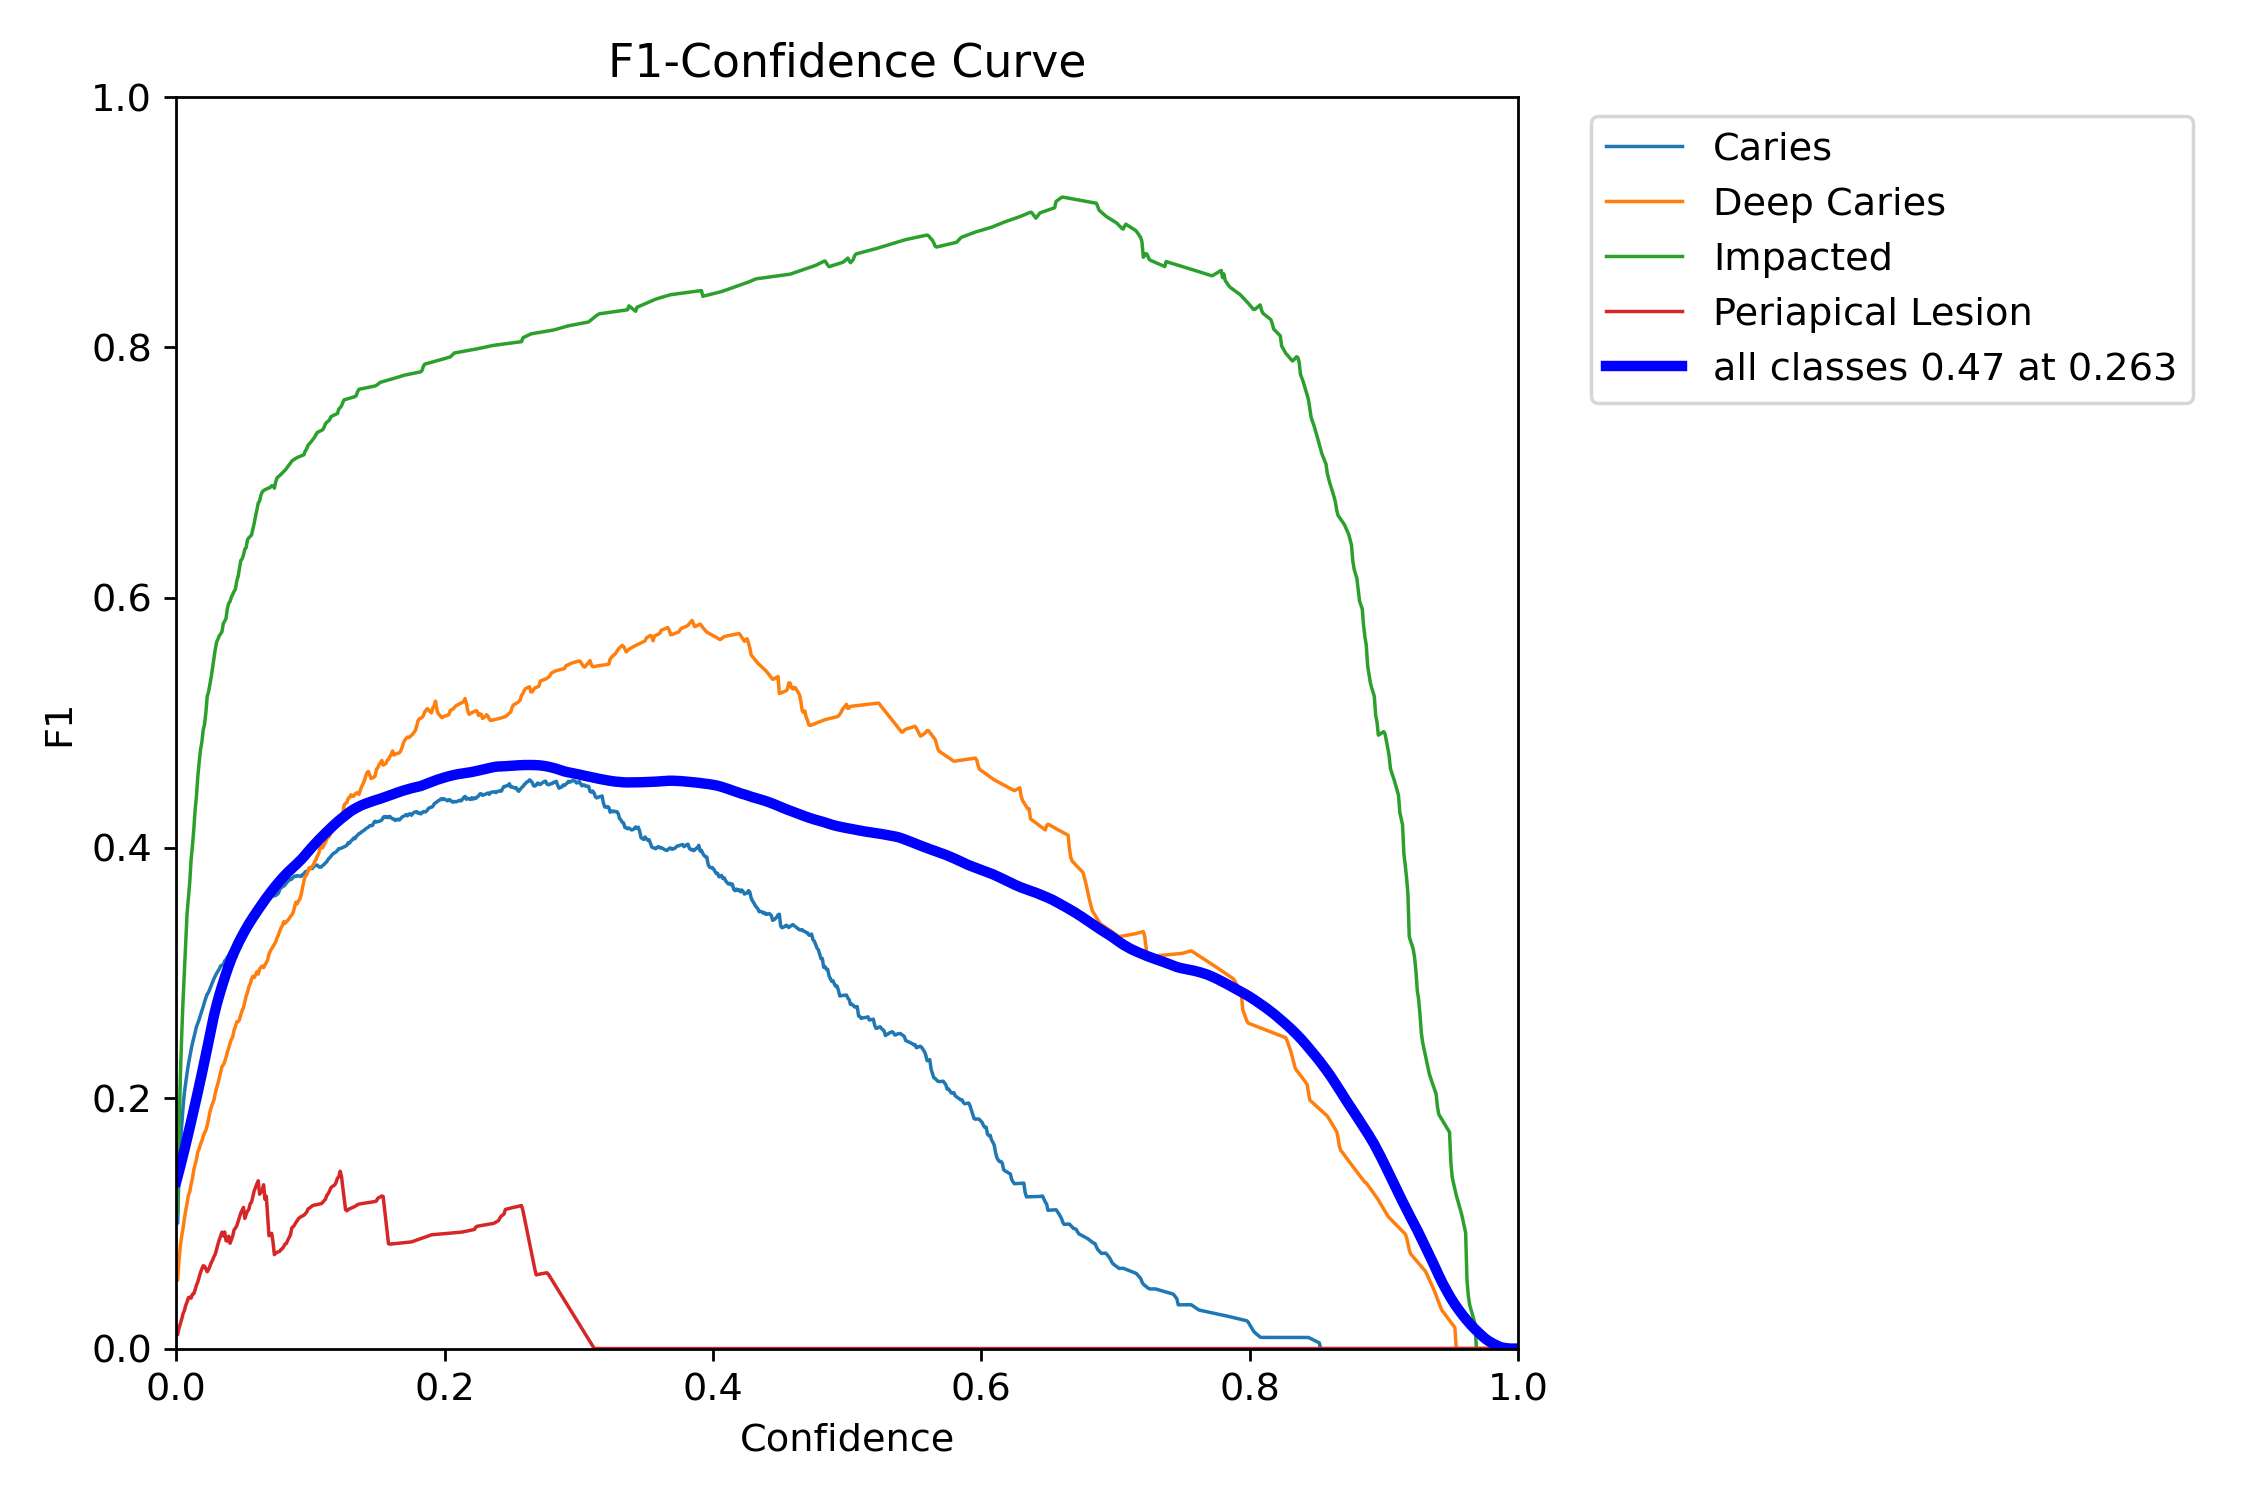

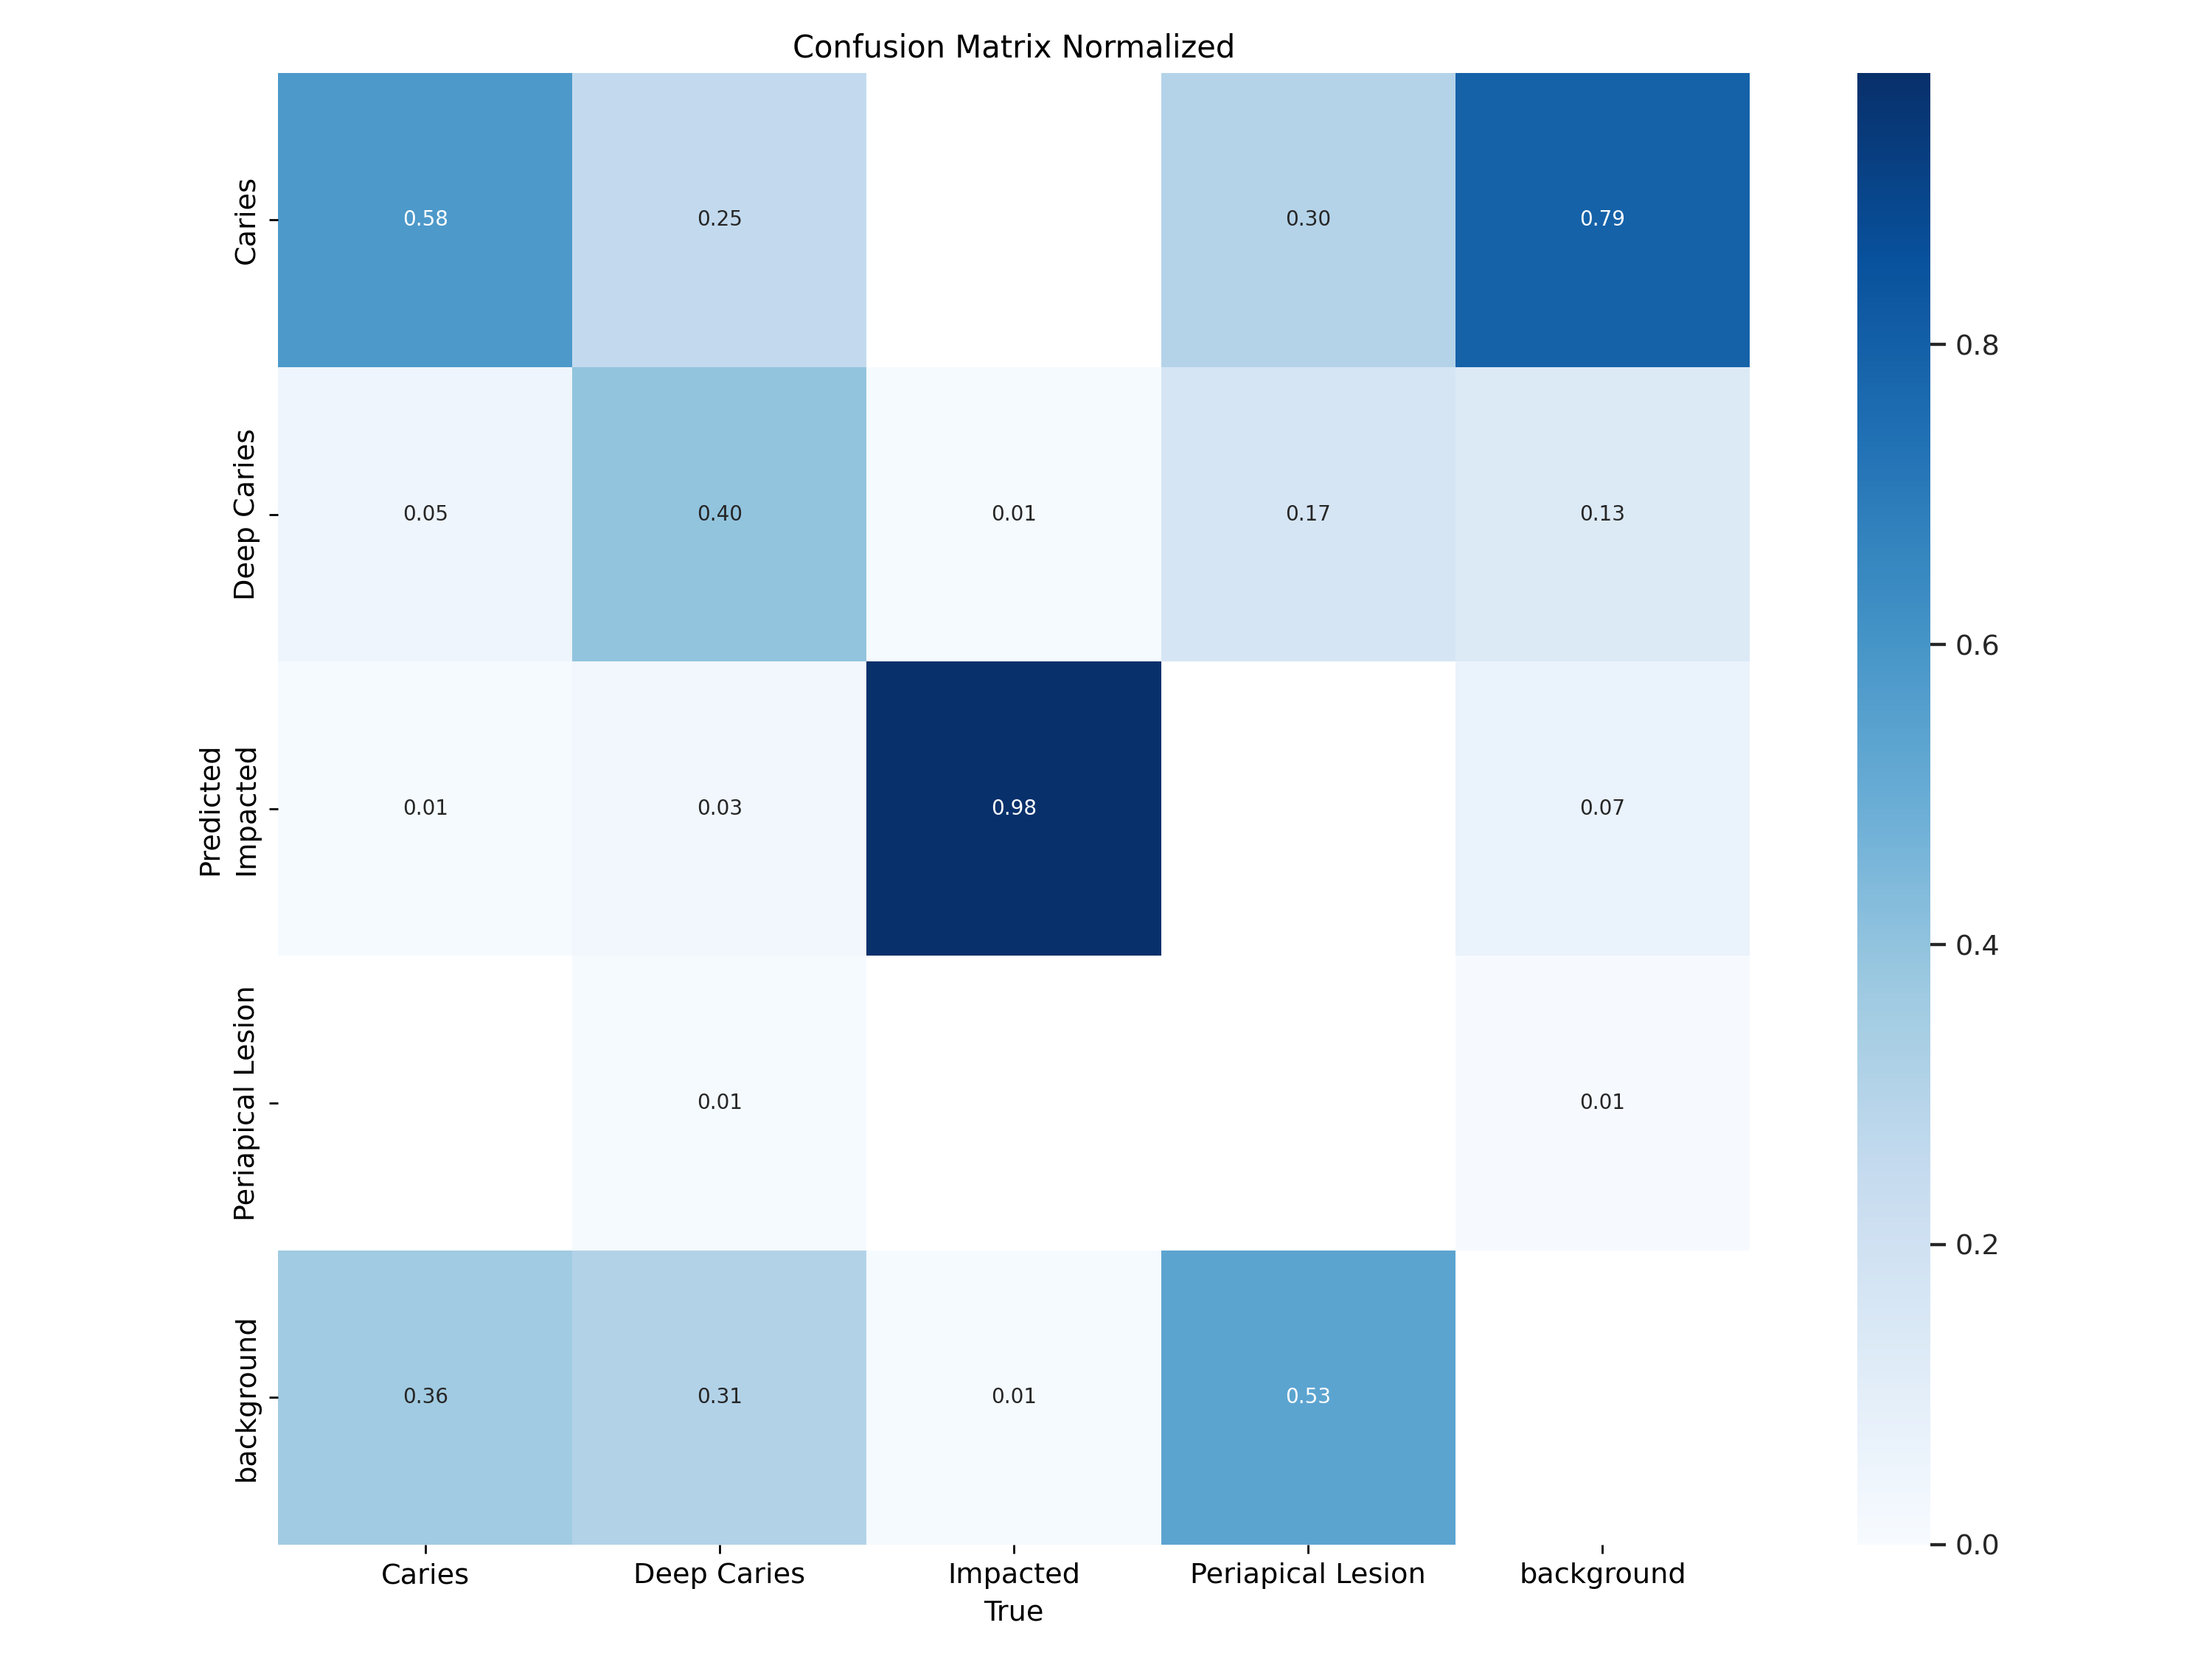

### Notas parciales:

```
Model Summary (fused):
- **Layers**: 186
- **Parameters**: 2,685,148
- **Gradients**: 0
- **GFLOPs**: 6.8

| Class                  | Images | Instances | Box(P) | R    | mAP50 | mAP50-95 |
|------------------------|--------|-----------|--------|------|-------|----------|
| **all**                | 151    | 709       | 0.467  | 0.564| 0.497 | 0.321    |
| **Caries**             | 128    | 447       | 0.351  | 0.620| 0.404 | 0.292    |
| **Deep Caries**        | 69     | 126       | 0.464  | 0.579| 0.557 | 0.354    |
| **Impacted**           | 48     | 106       | 0.677  | 0.991| 0.956 | 0.604    |
| **Periapical Lesion**  | 23     | 30        | 0.377  | 0.067| 0.071 | 0.034    |

```

Después de entrenar nuestro modelo YOLO para la detección de condiciones dentales, obtuvimos algunos resultados interesantes. Vamos a analizarlos:

1. Rendimiento general:
Nuestro modelo alcanzó un mAP50 de 0.497, lo que significa que está detectando objetos con una precisión media del 49.7% cuando consideramos un umbral de IoU del 50%. No está mal, pero definitivamente hay espacio para mejorar.

2. Precisión y Recall:
Obtuvimos una precisión de 0.467 y un recall de 0.564. En términos simples, esto sugiere que nuestro modelo es un poco mejor encontrando condiciones dentales reales (recall) que evitando falsos positivos (precisión).

3. Configuración del entrenamiento:
Usamos dropout de 0.3, lo cual probablemente ayudó a prevenir el overfitting, especialmente considerando que nuestro dataset no es muy grande.ç

4. Áreas de mejora:

- Definitivamente necesitamos más imágenes, sobre todo para las clases que el modelo tiene más dificultad en detectar.
- Podríamos experimentar con diferentes técnicas de aumento de datos.
- Tal vez valdría la pena probar otras arquitecturas de modelos o pesos pre-entrenados diferentes.



----
## Entrenamiento YOLOv8 - capas frezadas

> Añadir blockquote



Al congelar las primeras capas del modelo, estamos aprovechando las características generales aprendidas en el preentrenamiento de YOLO.
Esto puede ser especialmente útil cuando tenemos un dataset pequeño, como en nuestro caso con solo 755 imágenes

In [52]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

# Visualizo el modelo
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

En este caso vamos a congelar las primeras capas del modelo, esperando que al congelas estas aprovechemos las características generales aprendidas en el preentrenamiento de YOLO.

Esto puede ser especialmente útil cuando tenemos un dataset pequeño, como en nuestro caso con solo 755 imágenes.

Vamos a realizar esto dado que las capas iniciales suelen capturar características más generales, mientras que las capas finales se especializan en el problema específico.

Con esto estamos esperando que mejore la generalizacion del modelo.

In [53]:
n_layers_to_freeze = 10
for i, layer in enumerate(model.model.parameters()):
    if i < n_layers_to_freeze:
        layer.requires_grad = False

# Configurar el entrenamiento
model.train(
    data=data_path_yolo_1,  # Ruta al archivo .yaml
    epochs=50,
    imgsz=640,
    batch=32,
    save=True,
    patience=10,
    dropout=0.3,
    project=checkpoint_dir_yolo_1,
    augment=True,
    fliplr=0.5,
    flipud=0.5,
    freeze=n_layers_to_freeze  # Indicar el número de capas congeladas
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_1/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_1/, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/datasets/datasets_yolo_1/train/labels.cache... 529 images, 21 backgrounds, 0 corrupt: 100%|██████████| 529/529 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/datasets_yolo_1/train/images/train_377_png.rf.043e01bd001452ce7a160d7a15769d1f.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/datasets_yolo_1/valid/labels.cache... 151 images, 7 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]


Plotting labels to /content/vpc/checkpoints/datasets_yolo_1/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_1/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.59G      2.143      4.393      1.784        145        640: 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        151        709          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.47G      1.663      3.617      1.277        170        640: 100%|██████████| 17/17 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        151        709     0.0115      0.343       0.02    0.00573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.45G       1.54      2.817      1.195        177        640: 100%|██████████| 17/17 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all        151        709     0.0128      0.608     0.0401     0.0127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.75G      1.459      2.439       1.18        163        640: 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all        151        709     0.0139       0.56     0.0393     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.55G      1.413      2.309       1.16        128        640: 100%|██████████| 17/17 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all        151        709      0.018       0.69      0.131     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.82G      1.377      2.211      1.159        174        640: 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all        151        709     0.0162      0.831      0.233      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.48G      1.361      2.137      1.151        149        640: 100%|██████████| 17/17 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]


                   all        151        709      0.788      0.187      0.278      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.43G      1.344      2.119      1.149        210        640: 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        151        709      0.542      0.321      0.286      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.48G      1.318      2.044      1.126        187        640: 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]


                   all        151        709      0.521      0.343       0.29      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.56G      1.299      1.972      1.129        180        640: 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        151        709      0.542      0.402       0.31       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.54G      1.275      1.959      1.111        118        640: 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all        151        709      0.489      0.395      0.302      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.51G       1.27      1.961      1.114        170        640: 100%|██████████| 17/17 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        151        709      0.527      0.433      0.312      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.49G      1.255      1.884      1.107        138        640: 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        151        709       0.55      0.373      0.315      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.61G      1.249      1.886        1.1        152        640: 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all        151        709      0.535       0.43      0.327      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.56G      1.255      1.864      1.103        146        640: 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all        151        709      0.514      0.402      0.323      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.47G      1.255      1.854      1.106        167        640: 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all        151        709      0.535       0.44      0.321      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.45G      1.233      1.835      1.096        113        640: 100%|██████████| 17/17 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all        151        709      0.586      0.423      0.331      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.67G      1.242      1.803      1.097        131        640: 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        151        709      0.552      0.428      0.339      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.44G      1.227      1.802      1.083        193        640: 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        151        709      0.587      0.396       0.35      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.56G       1.22      1.786      1.088        159        640: 100%|██████████| 17/17 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all        151        709      0.591      0.425      0.355      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.51G      1.205      1.731      1.079        198        640: 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        151        709        0.6      0.418      0.352      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.55G      1.211      1.772      1.083        170        640: 100%|██████████| 17/17 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all        151        709      0.578      0.398      0.349      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.56G      1.212      1.727      1.077        208        640: 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        151        709      0.573      0.439       0.36      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.55G      1.205       1.73      1.077        231        640: 100%|██████████| 17/17 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        151        709      0.544       0.46      0.356      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.49G        1.2      1.723      1.077        195        640: 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all        151        709      0.599      0.408      0.358      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.51G      1.202        1.7      1.072        191        640: 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        151        709      0.544      0.458      0.353      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.5G      1.179      1.683      1.072        162        640: 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        151        709      0.576      0.456      0.374      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.54G      1.193      1.675       1.07        212        640: 100%|██████████| 17/17 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        151        709      0.596      0.476      0.371      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.58G      1.189       1.69      1.066        162        640: 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        151        709      0.338      0.486      0.368      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.63G      1.181      1.666      1.072        142        640: 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        151        709      0.599      0.464      0.377      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.64G      1.163      1.683      1.051        163        640: 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all        151        709      0.598      0.424      0.378      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.5G      1.194       1.68      1.082         96        640: 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all        151        709       0.33      0.473      0.369      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.46G      1.177      1.647      1.067        114        640: 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        151        709      0.365      0.523      0.387      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.74G      1.162      1.634      1.054        133        640: 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all        151        709      0.394      0.481      0.388      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.64G      1.155      1.613      1.053        148        640: 100%|██████████| 17/17 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        151        709      0.364      0.465      0.391      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.48G      1.173      1.601      1.059        200        640: 100%|██████████| 17/17 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all        151        709      0.366      0.458      0.396       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.5G       1.14      1.615      1.048        117        640: 100%|██████████| 17/17 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        151        709      0.357      0.444      0.391      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.6G       1.14      1.621      1.047        139        640: 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all        151        709       0.33      0.477      0.386      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.5G       1.14      1.602      1.051        143        640: 100%|██████████| 17/17 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        151        709      0.307      0.494      0.388      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.65G      1.159      1.606      1.059        129        640: 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        151        709      0.382      0.437      0.388      0.249


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.68G      1.136      1.756      1.069         70        640: 100%|██████████| 17/17 [00:06<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all        151        709       0.34      0.506      0.373      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G      1.139       1.67      1.058         69        640: 100%|██████████| 17/17 [00:03<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        151        709      0.318      0.469      0.377      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G      1.131      1.653      1.053         63        640: 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        151        709      0.628      0.451      0.378      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      1.112       1.61      1.054         63        640: 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        151        709       0.38      0.436      0.389      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.31G      1.124      1.613      1.042         65        640: 100%|██████████| 17/17 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        151        709      0.632      0.428      0.395      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G      1.105      1.595      1.042         87        640: 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all        151        709      0.654      0.422      0.396       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.28G      1.111      1.594      1.048         61        640: 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all        151        709       0.64      0.413      0.393      0.251
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 0.068 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_1/train/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_1/train/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_1/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,148 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all        151        709      0.608      0.438      0.398      0.254
                Caries        128        447      0.347      0.499      0.345      0.241
           Deep Caries         69        126      0.365      0.317      0.308      0.191
              Impacted         48        106      0.719      0.934      0.903      0.564
     Periapical Lesion         23         30          1          0     0.0368     0.0201
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_1/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33c66de980>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

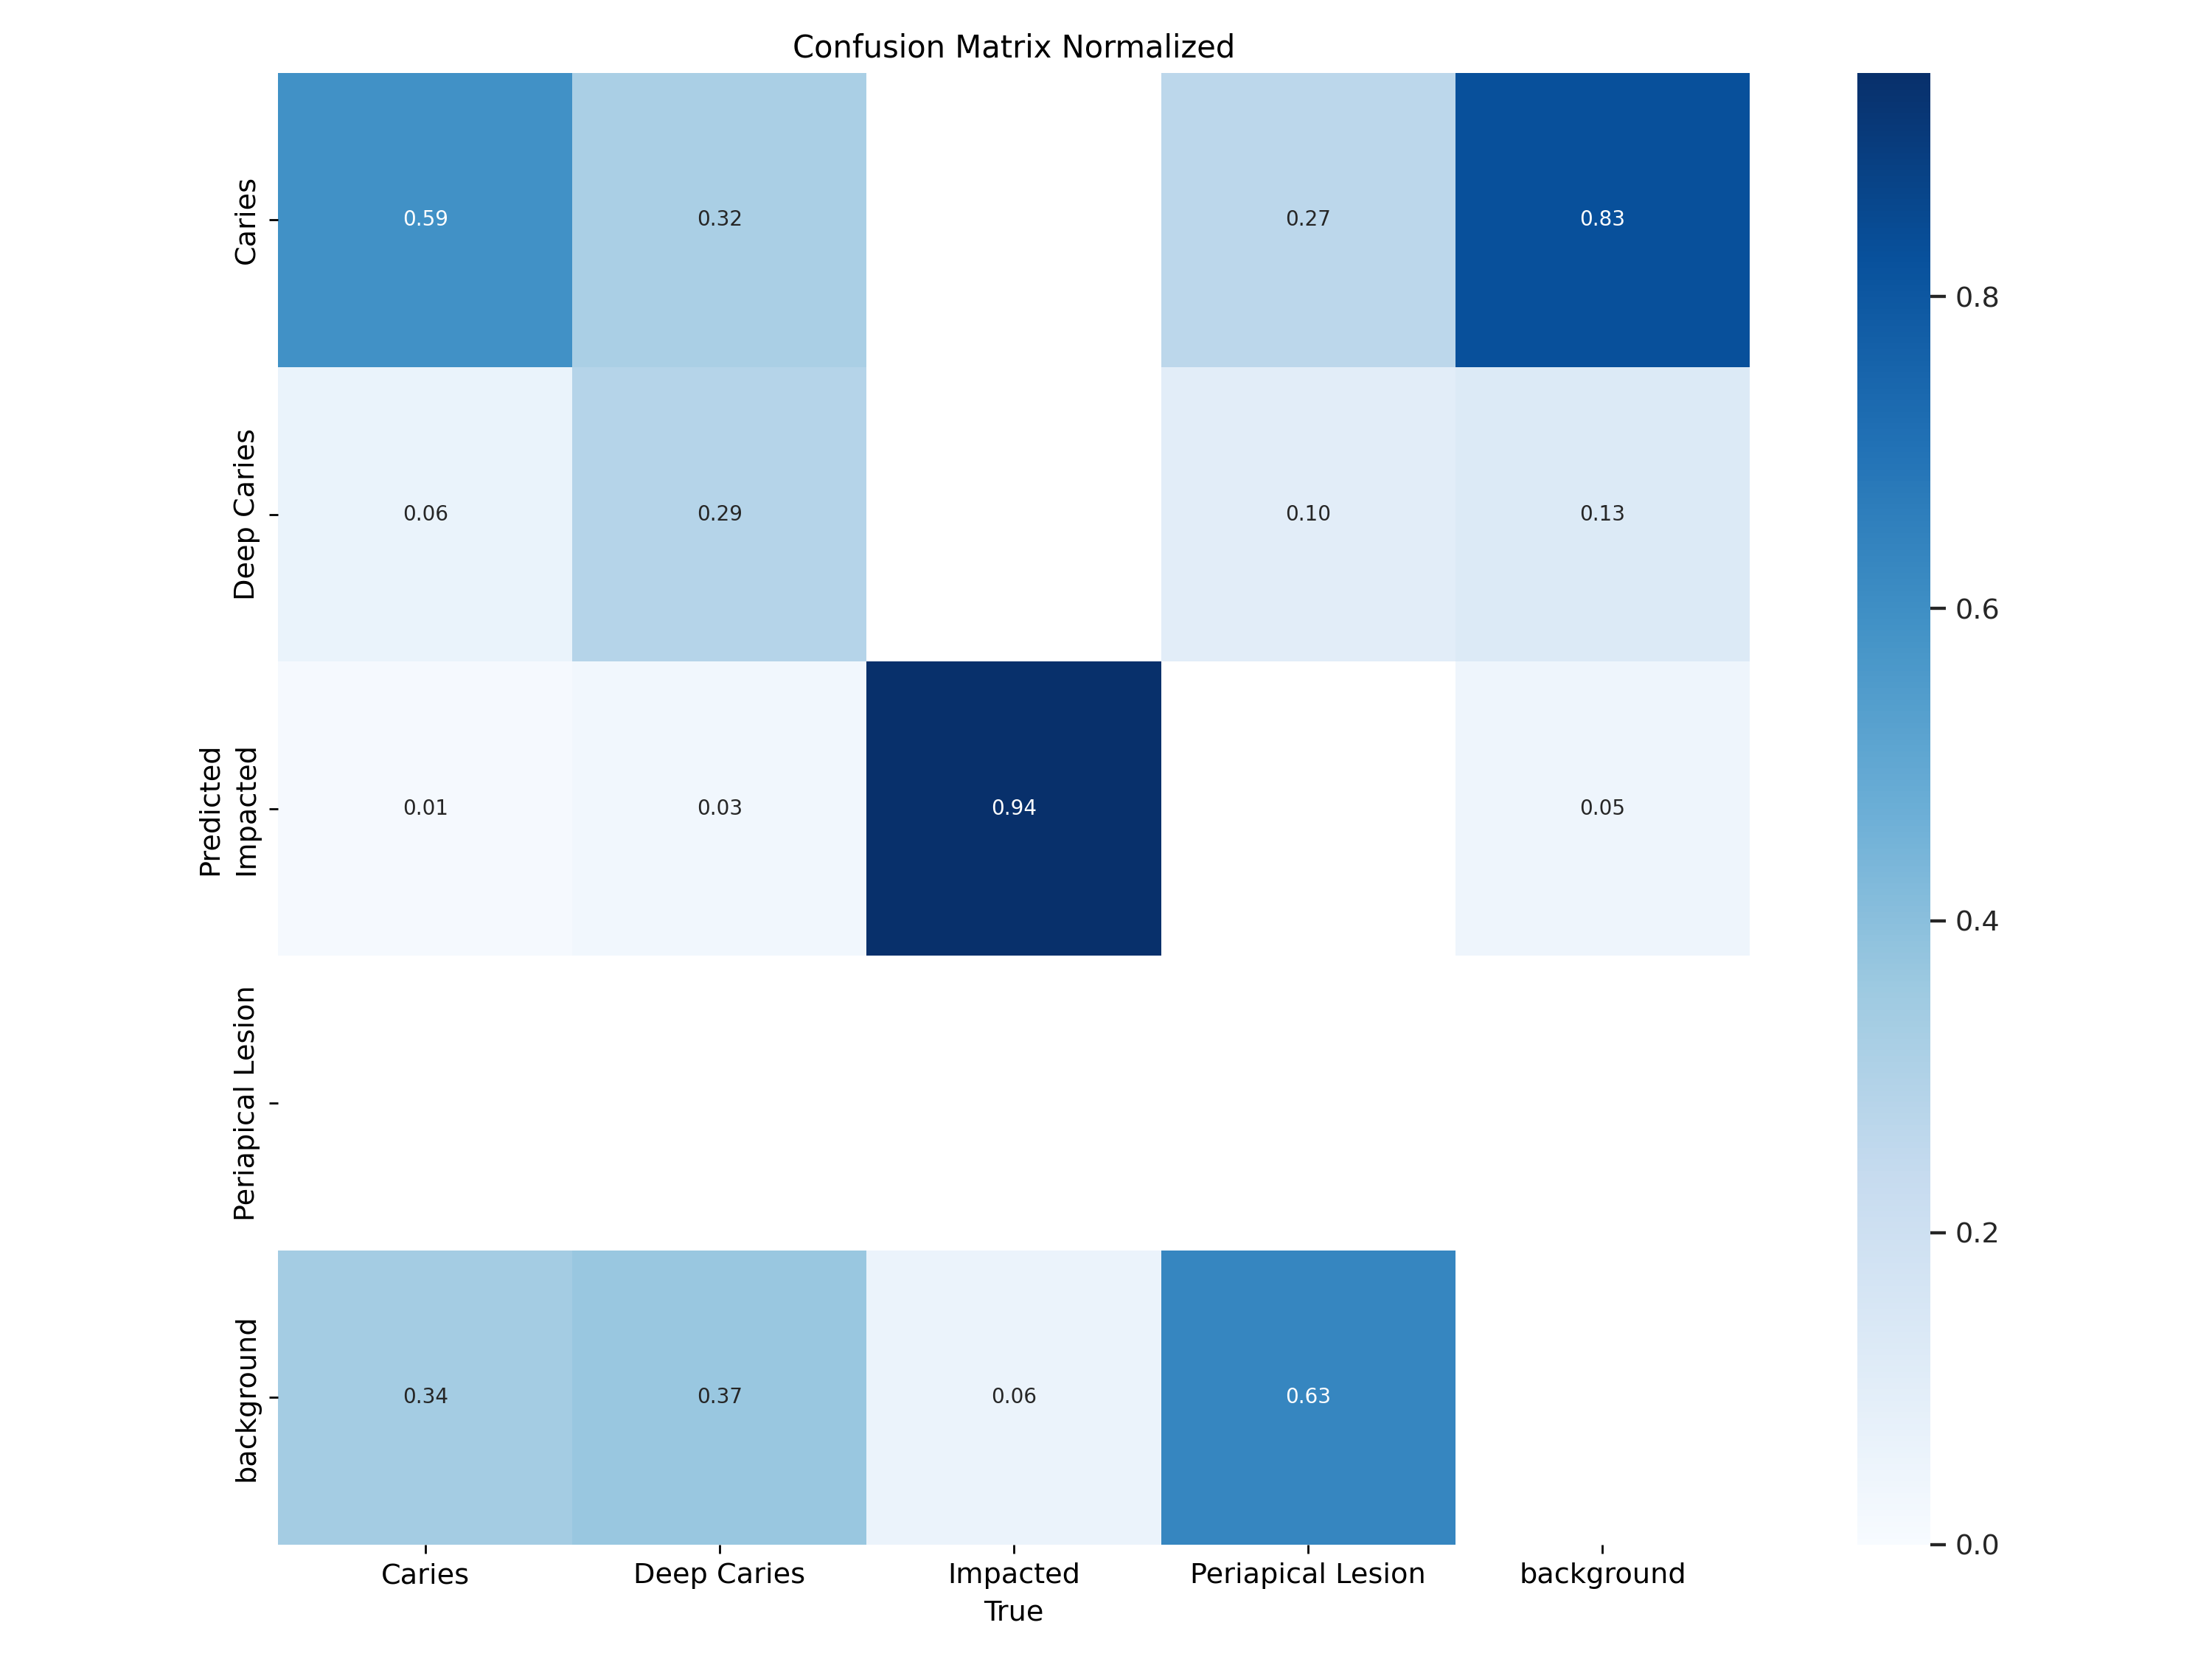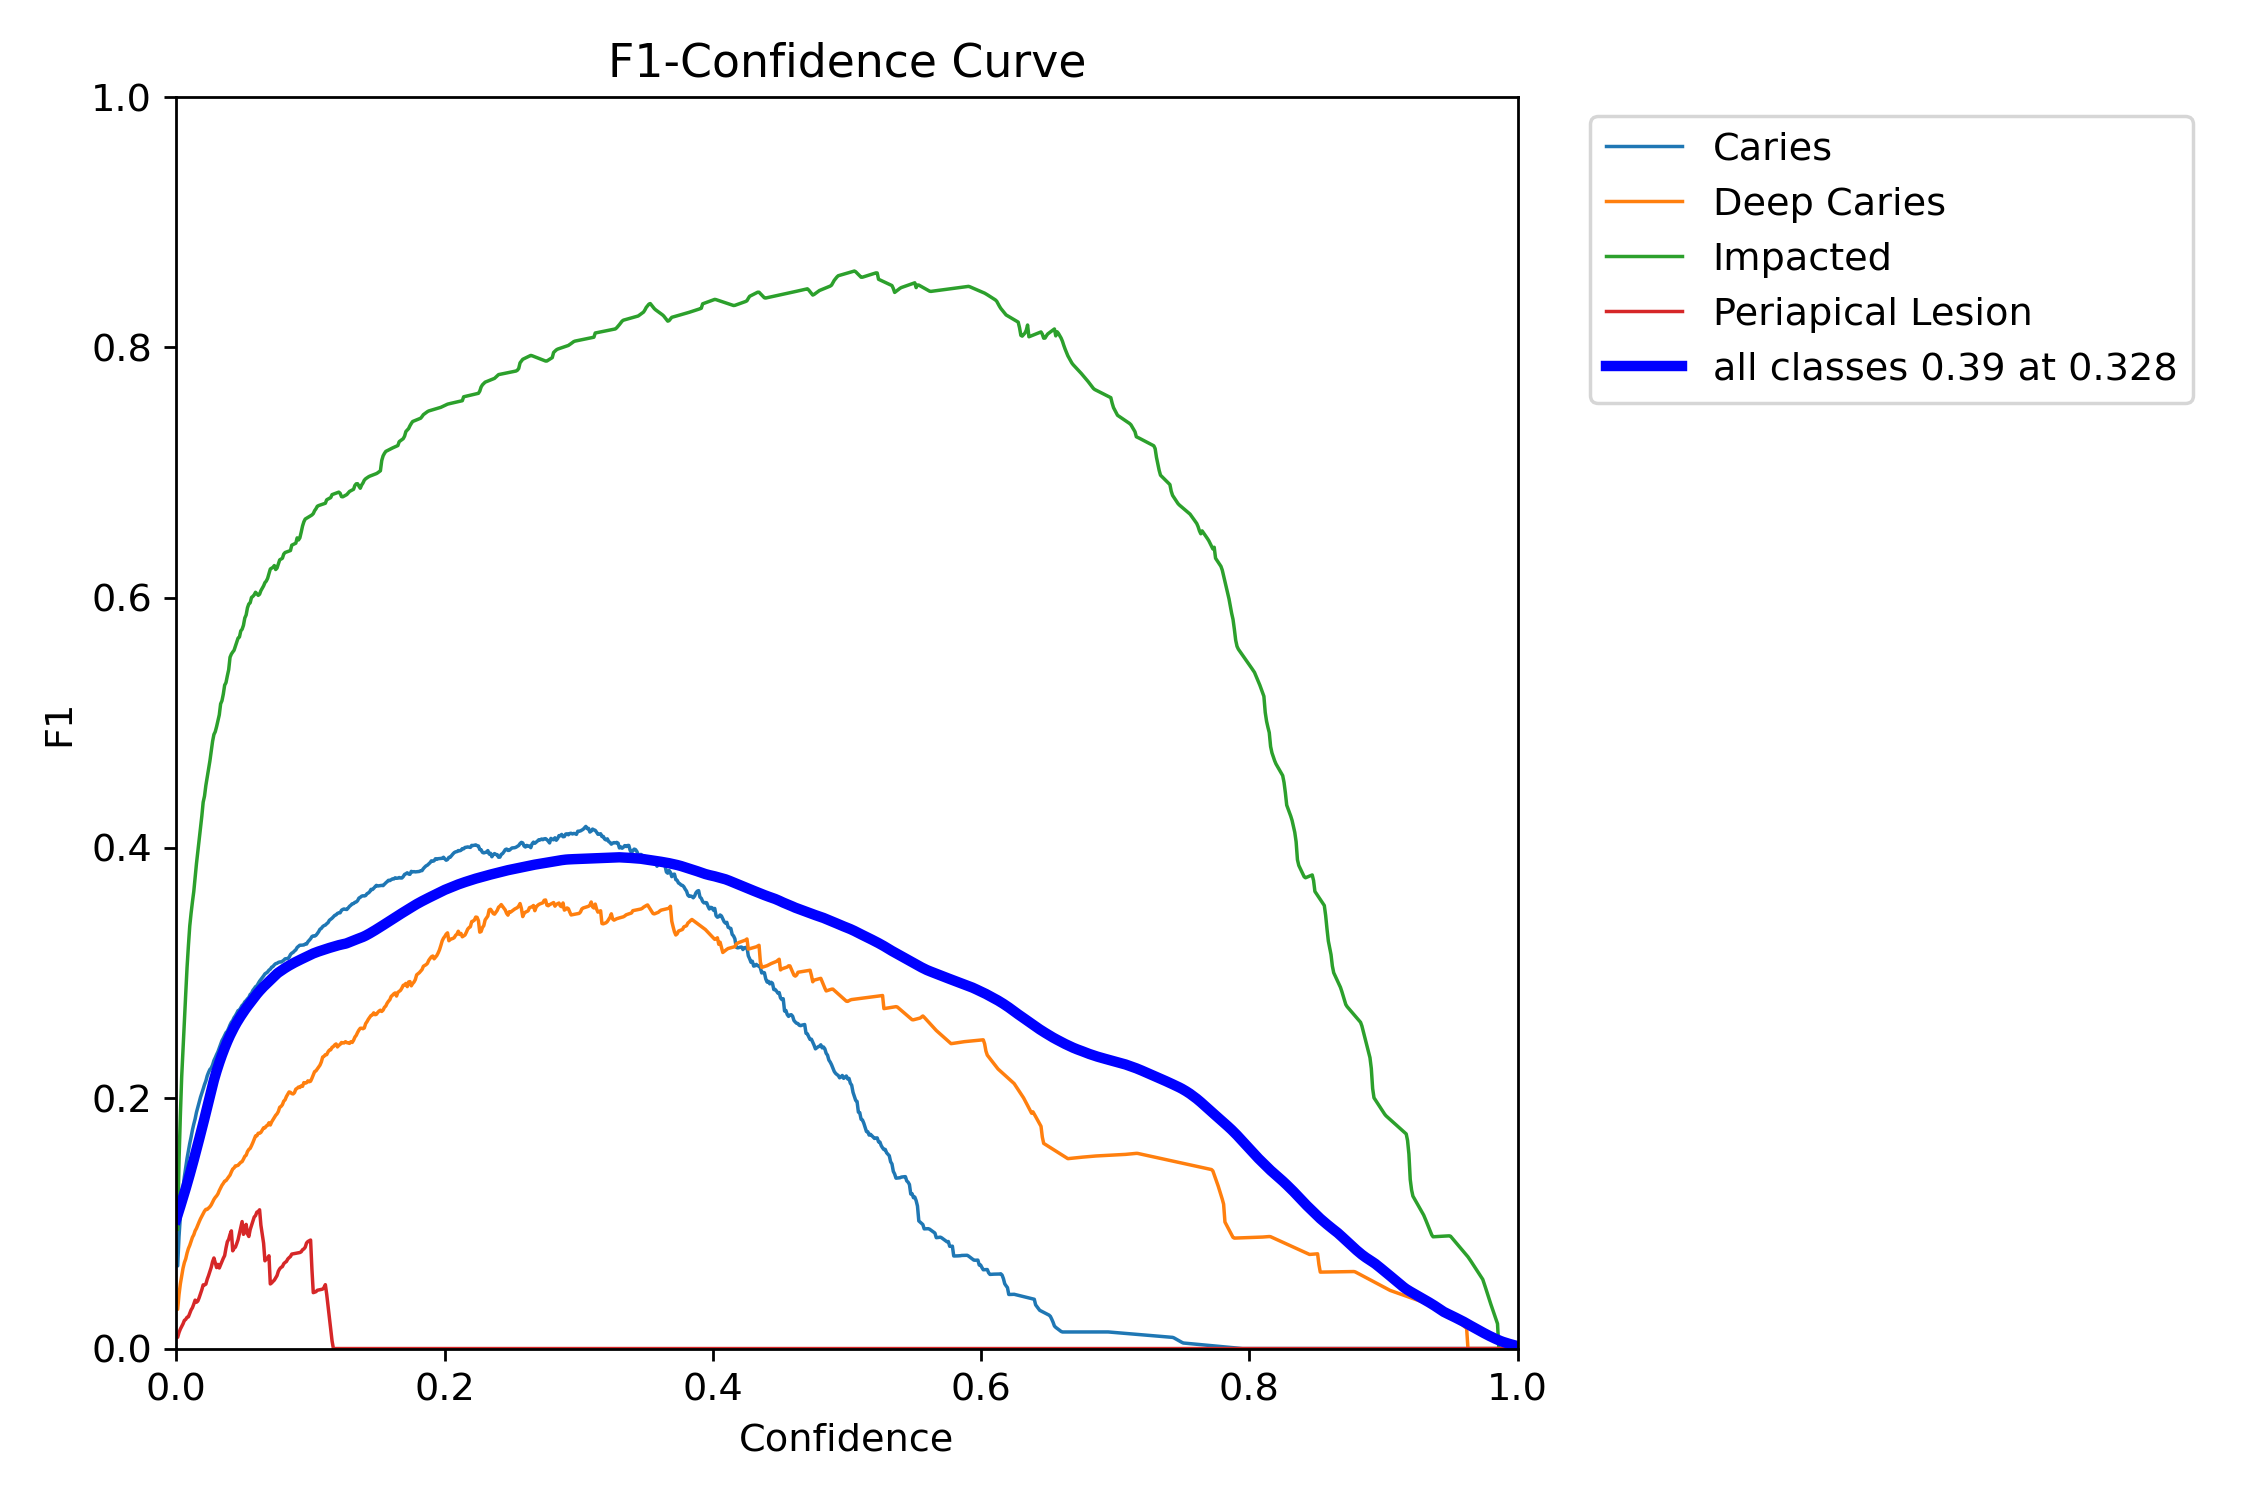

### Notas parciales

- Impacto del Congelamiento de Capas: El entrenamiento del modelo YOLO con las primeras capas congeladas resultó en una disminución en el rendimiento general. Esto sugiere que la red no pudo adaptarse adecuadamente a las características específicas de nuestro conjunto de datos de condiciones dentales. Es posible que el congelamiento de capas limitara la capacidad del modelo para aprender representaciones adecuadas. Sumado tambien a que dada la naturaleza del problema, puede que el mismo no pueda aprender correctamente las primeras representaciones.

- Rendimiento General: Comparado con el modelo entrenado sin capas congeladas, el rendimiento del modelo con capas congeladas mostró una caída en el mAP50. Este cambio indica que la red puede no haber podido ajustar correctamente los pesos en las capas posteriores para mejorar la detección de objetos en nuestro contexto específico.

## Conclusiones:

Aunque en esta sección solo mostramos dos entrenamientos, este notebook refleja la consolidación de nuestro trabajo, organizado para facilitar su comprensión por parte del lector.

En experimentos previos (no incluidos aquí), exploramos diferentes hipótesis, como la reducción del learning rate, el cambio de optimizadores y la variación del tamaño de batch, entre otros. Sin embargo, no logramos obtener resultados satisfactorios con esta arquitectura para nuestro problema, ya que la red se estancó en un mAP50 cercano al 47%, un valor insuficiente para los objetivos de precisión que requerimos.

Asimismo, probamos la estrategia de *transfer learning*, pero no resultó beneficiosa en nuestro caso. De hecho, observamos una disminución en el rendimiento del modelo, lo que sugiere que las características aprendidas en otros contextos no fueron útiles para las particularidades de nuestro dataset.

Este análisis nos lleva a la conclusión de que, para este problema en particular, es necesario seguir explorando arquitecturas y estrategias de entrenamiento que se adapten mejor a las características del dataset.

---

# DATASETS YOLO 2

En esta sección, llevaremos a cabo el entrenamiento de un modelo YOLOv11 para la detección de objetos en el siguiente dataset dental:

- [DATASET YOLO 2](https://drive.google.com/file/d/1-XUK2Z1UurBsUIvi0zKrYx-8ISotRSQH/view?usp=drive_link)

## Disclaimer

En este dataset y en el posterior, estamos utilizando una versión corregida de la misma base. Después de realizar múltiples experimentos con el **Dataset 1**, llegamos a la conclusión de que la causa del bajo rendimiento del modelo se debía al etiquetado erróneo de los datos. Las etiquetas no representaban adecuadamente las condiciones que estábamos buscando, como caries o caries profundas, ya que se etiquetaba la totalidad del diente en lugar de las áreas afectadas. Esto dificultaba que la red aprendiera a generalizar correctamente, lo que resultaba en confusión durante la clasificación.

Dado que el **Dataset 1** formaba parte de una competencia, buscamos una versión mejorada en la misma competencia y encontramos un dataset corregido por otro competidor. En esta versión, las etiquetas representaban de manera más precisa los casos de uso de los dientes en cuestión.

Por lo tanto, decidimos cambiar de dataset. A continuación, se mostrará la versión base en el **Dataset YOLO 2**, que no incluye data augmentation. Solo utilizaremos la técnica de data augmentation propuesta por Ultralyics. Posteriormente, presentaremos la versión 3, que empleará el dataset con el data augmentation previamente aplicado.


## Entrenamiento inicial

In [54]:
# Definir la ruta donde se guardarán los checkpoints en Drive
checkpoint_dir_parent = '/content/vpc/checkpoints/'

In [55]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_parent, exist_ok=True)

In [72]:
# Definir la ruta donde se guardarán los checkpoints en Drive para el datasets original
checkpoint_dir_yolo_2 = checkpoint_dir_parent+"datasets_yolo_2/"
checkpoint_dir_yolo_2

'/content/vpc/checkpoints/datasets_yolo_2/'

In [73]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_yolo_2, exist_ok=True)

In [74]:
# Carpeta padre de los datasets
datasets_parent_dir

'/content/datasets/'

In [75]:
data_path_yolo_2 = os.path.join(datasets_parent_dir, 'datasets_yolo_2/data.yaml')
data_path_yolo_2

'/content/datasets/datasets_yolo_2/data.yaml'

In [76]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

model.train(
    data=data_path_yolo_2,  # Ruta al archivo .yaml
    epochs=50,        # Número de épocas
    imgsz=640,        # Tamaño de la imagen
    batch=32,         # Tamaño del batch
    save=True,        # Guardar los checkpoints
    patience=10,      # Early stopping
    dropout=0.3,      # Dropout durante el entrenamiento
    project=checkpoint_dir_yolo_2,  # Carpeta de salida
    augment=True,     # data augmentation
    fliplr=0.5,
    flipud=0.5
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_2/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_2/, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/datasets/datasets_yolo_2/train/labels... 564 images, 44 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<00:00, 1128.78it/s]


train: New cache created: /content/datasets/datasets_yolo_2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/datasets_yolo_2/valid/labels... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 1016.96it/s]

val: New cache created: /content/datasets/datasets_yolo_2/valid/labels.cache


Plotting labels to /content/vpc/checkpoints/datasets_yolo_2/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_2/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.07G      2.366      4.543       1.57        214        640: 100%|██████████| 18/18 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all        161        869          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.84G      1.736      3.535      1.122        204        640: 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


                   all        161        869   0.000321     0.0163    0.00117   0.000644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.61G      1.677      2.604      1.069        263        640: 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all        161        869    0.00176     0.0525     0.0165    0.00932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.88G      1.613      1.988      1.066        250        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all        161        869    0.00335      0.139     0.0933     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.96G      1.563      1.859      1.078        185        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        161        869     0.0117      0.419      0.263      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.87G      1.535      1.682      1.066        244        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]


                   all        161        869      0.895      0.189      0.515       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.06G      1.486      1.526      1.064        228        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all        161        869      0.802      0.358      0.531      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.87G      1.498      1.524      1.055        149        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


                   all        161        869      0.722      0.444      0.495      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.14G      1.468      1.486      1.046        140        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]


                   all        161        869      0.787      0.512      0.584      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.88G      1.442      1.402      1.053        210        640: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        161        869      0.783      0.565      0.596      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.73G      1.437      1.364      1.046        218        640: 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all        161        869      0.777      0.568      0.606      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.09G      1.428      1.357      1.044        171        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all        161        869      0.741      0.587      0.591      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.93G      1.417      1.301      1.039        208        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all        161        869      0.774      0.524      0.597       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.18G      1.445        1.3      1.049        202        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all        161        869      0.756      0.582      0.618      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         5G      1.406      1.212      1.031        206        640: 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        161        869      0.812      0.581      0.625      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.05G      1.389      1.195      1.031        243        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]


                   all        161        869      0.798      0.605      0.633      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.13G      1.376      1.188       1.03        180        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        161        869      0.767       0.63      0.653      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         5G      1.388      1.205      1.019        206        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all        161        869      0.754      0.596      0.611      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.63G      1.354      1.159      1.019        251        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        161        869      0.765      0.583      0.645      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.58G      1.373      1.154      1.023        217        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        161        869      0.794      0.582      0.658      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.66G      1.349      1.125       1.02        224        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all        161        869      0.814      0.595      0.694      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.75G      1.344      1.112      1.008        199        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all        161        869      0.683      0.729      0.739      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.96G      1.354      1.109      1.018        232        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all        161        869      0.752      0.658      0.738      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.85G       1.34       1.06      1.012        207        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        161        869      0.705       0.65      0.717      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.02G      1.345      1.052      1.022        238        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all        161        869      0.817      0.675        0.8      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.61G      1.331       1.06      1.015        197        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all        161        869      0.736       0.79      0.792      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.57G      1.332       1.06      1.001        227        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all        161        869      0.773      0.726        0.8      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.93G      1.324      1.032      1.007        226        640: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all        161        869      0.755      0.779      0.814      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         5G      1.307      1.026     0.9987        244        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        161        869      0.768      0.762      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.97G      1.319      1.017      1.007        211        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all        161        869      0.793      0.769      0.825      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.88G      1.301      1.015     0.9959        241        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all        161        869      0.711      0.817      0.832      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.44G      1.294     0.9951     0.9973        228        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        161        869      0.769      0.815      0.826      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.85G      1.316     0.9917          1        184        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        161        869      0.711      0.861      0.838      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.12G       1.29     0.9668      1.002        198        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        161        869       0.82      0.793       0.84      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.04G      1.278     0.9489     0.9817        227        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all        161        869      0.791       0.87      0.848      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.91G      1.279     0.9293     0.9928        165        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all        161        869      0.792      0.849      0.858      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.79G      1.275     0.9554     0.9974        186        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all        161        869       0.75      0.811      0.834      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.17G       1.27     0.9178     0.9819        206        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all        161        869      0.735      0.867       0.85      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.35G      1.273     0.9164     0.9888        249        640: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        161        869      0.776      0.859      0.856      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.08G      1.258     0.9171     0.9846        314        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all        161        869      0.768      0.858      0.857      0.549


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.54G       1.29     0.9988      1.023        107        640: 100%|██████████| 18/18 [00:07<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all        161        869      0.794      0.819      0.843       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.43G      1.246     0.9366      1.007        145        640: 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all        161        869       0.82      0.826      0.854      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.48G      1.243     0.8967      1.013        134        640: 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all        161        869      0.822      0.831      0.859       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.62G      1.236     0.8729      1.006         88        640: 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all        161        869       0.77      0.851      0.859       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.61G      1.219     0.8853     0.9988        159        640: 100%|██████████| 18/18 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all        161        869      0.797      0.856      0.868      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.48G      1.229     0.8619      1.001        128        640: 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        161        869      0.809      0.826      0.861      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.6G      1.214     0.8728     0.9901        109        640: 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all        161        869      0.786      0.866      0.861      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.44G       1.21     0.8619     0.9964         66        640: 100%|██████████| 18/18 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all        161        869      0.799      0.859      0.863      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.42G      1.212      0.841     0.9984        110        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        161        869      0.808      0.859      0.861       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.55G      1.202     0.8617     0.9971        131        640: 100%|██████████| 18/18 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all        161        869      0.804      0.864      0.863      0.561



50 epochs completed in 0.100 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_2/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


                   all        161        869      0.775      0.851      0.854      0.548
                caries        100        271      0.573      0.514      0.574      0.342
                corona         50        290      0.832      0.979      0.968      0.627
      diente impactado         44         88      0.771      0.882      0.859      0.638
            endodoncia         85        211      0.804      0.938      0.907      0.458
              implante          3          9      0.894      0.943      0.962      0.674
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_2/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33682aa200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

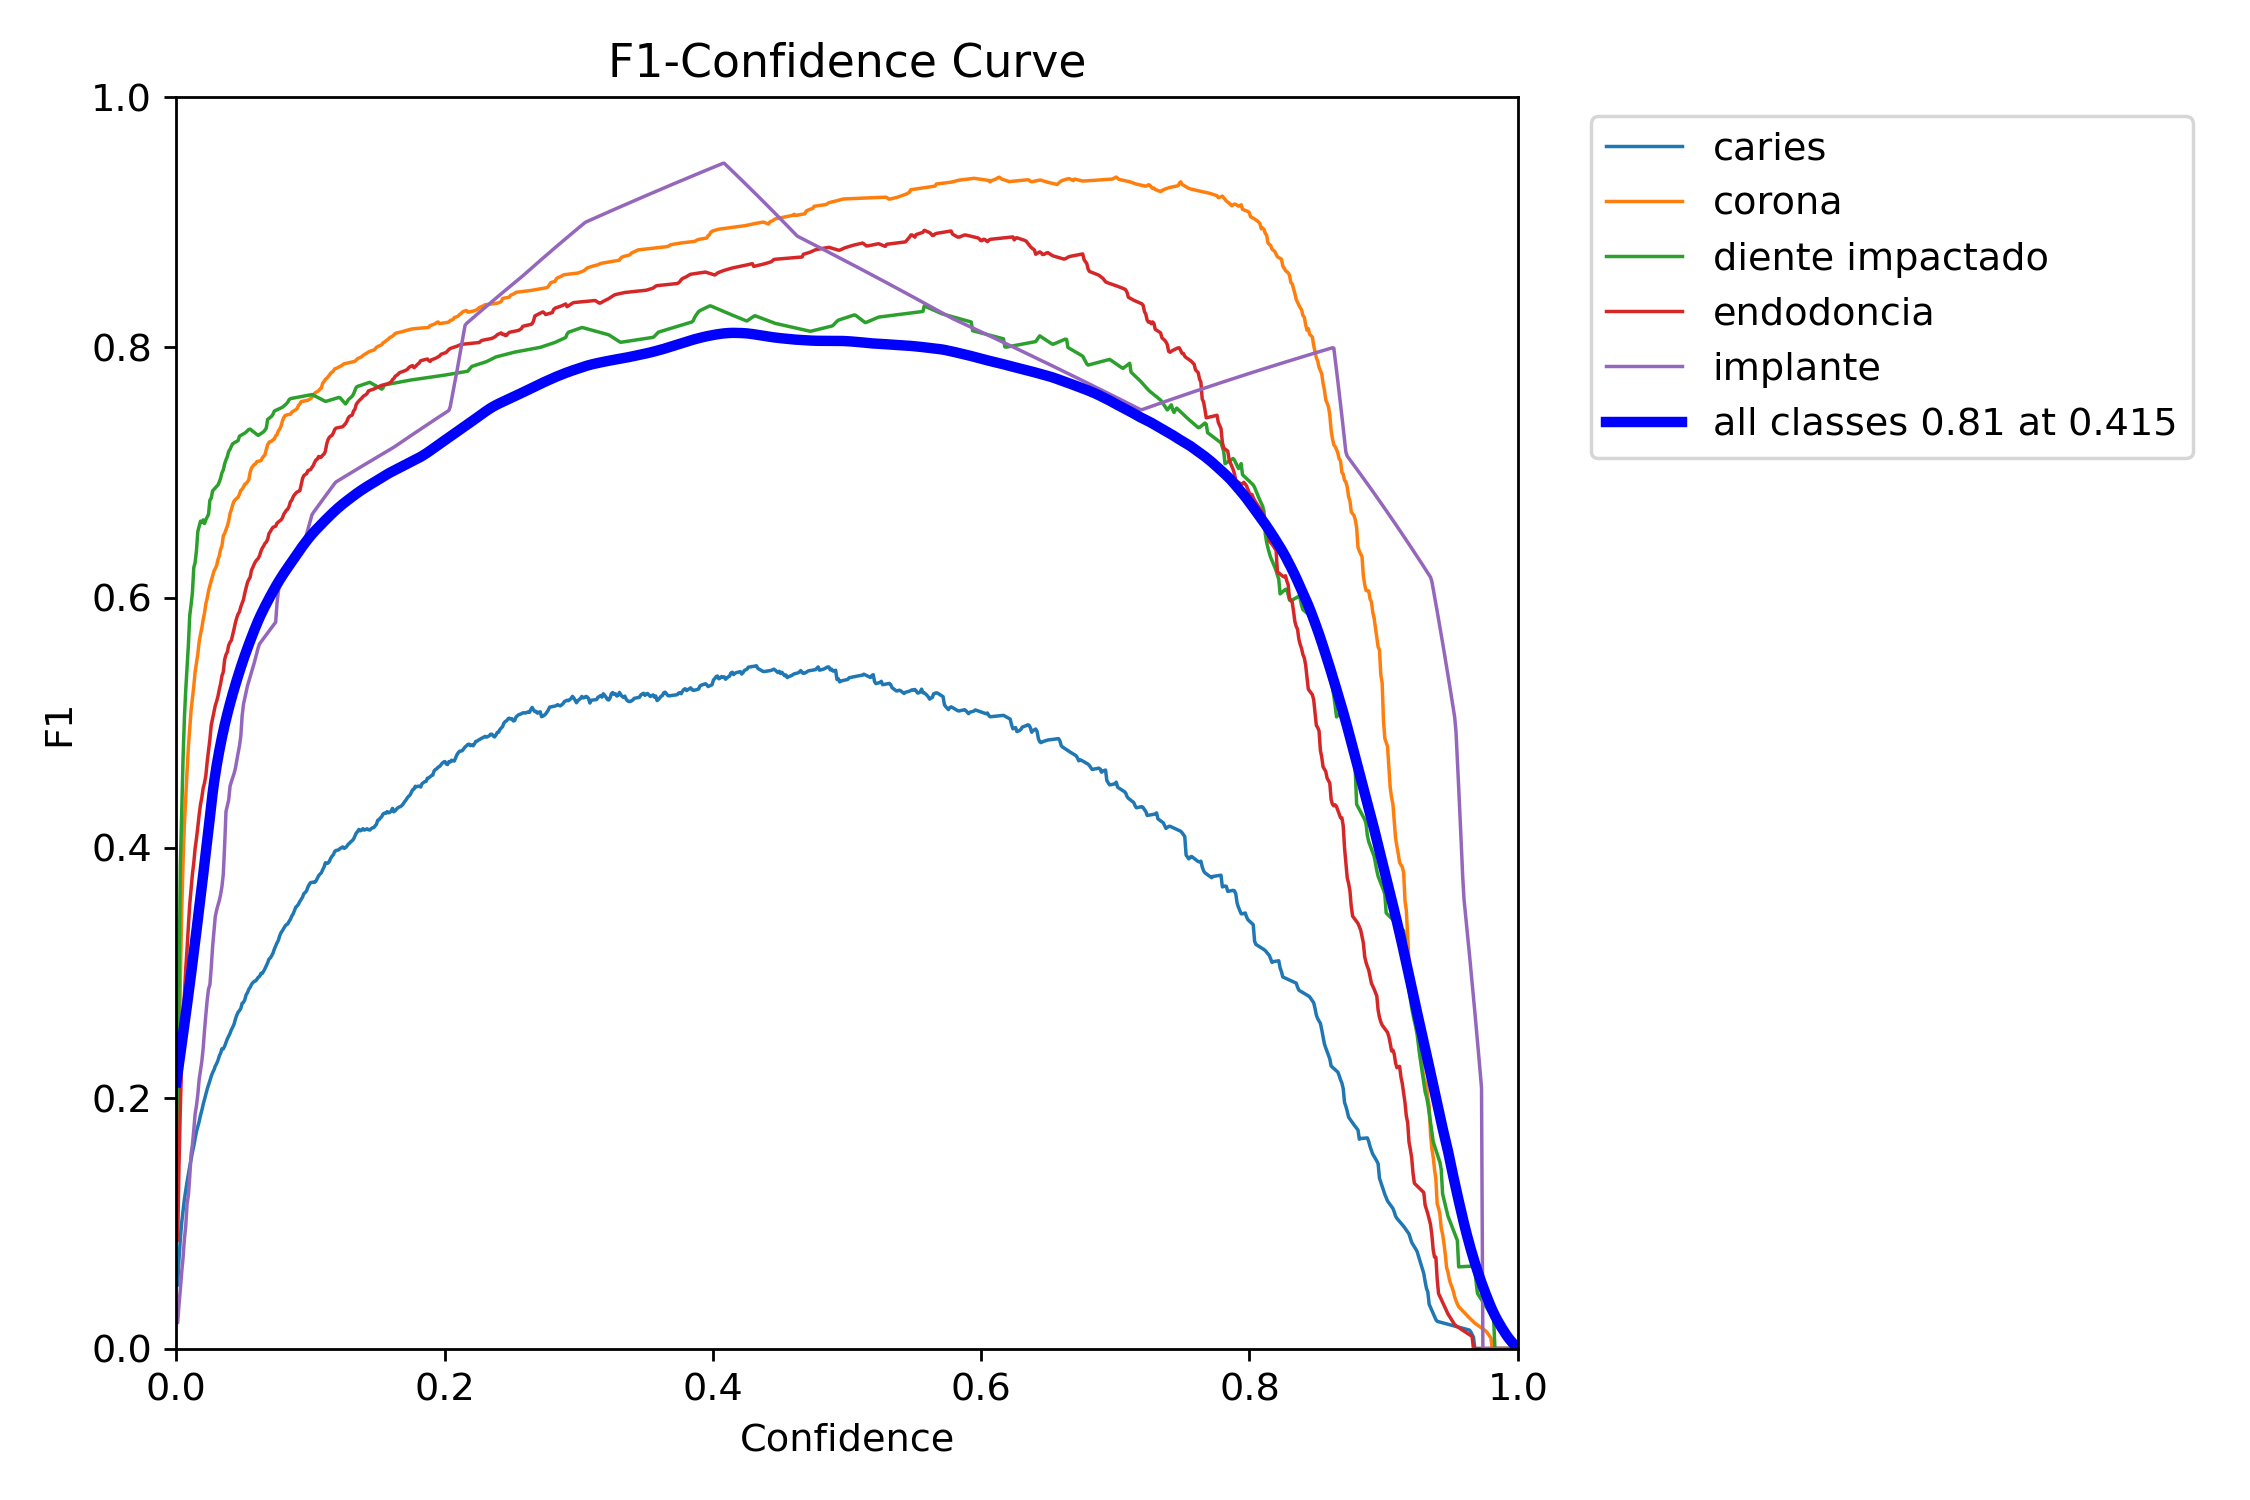

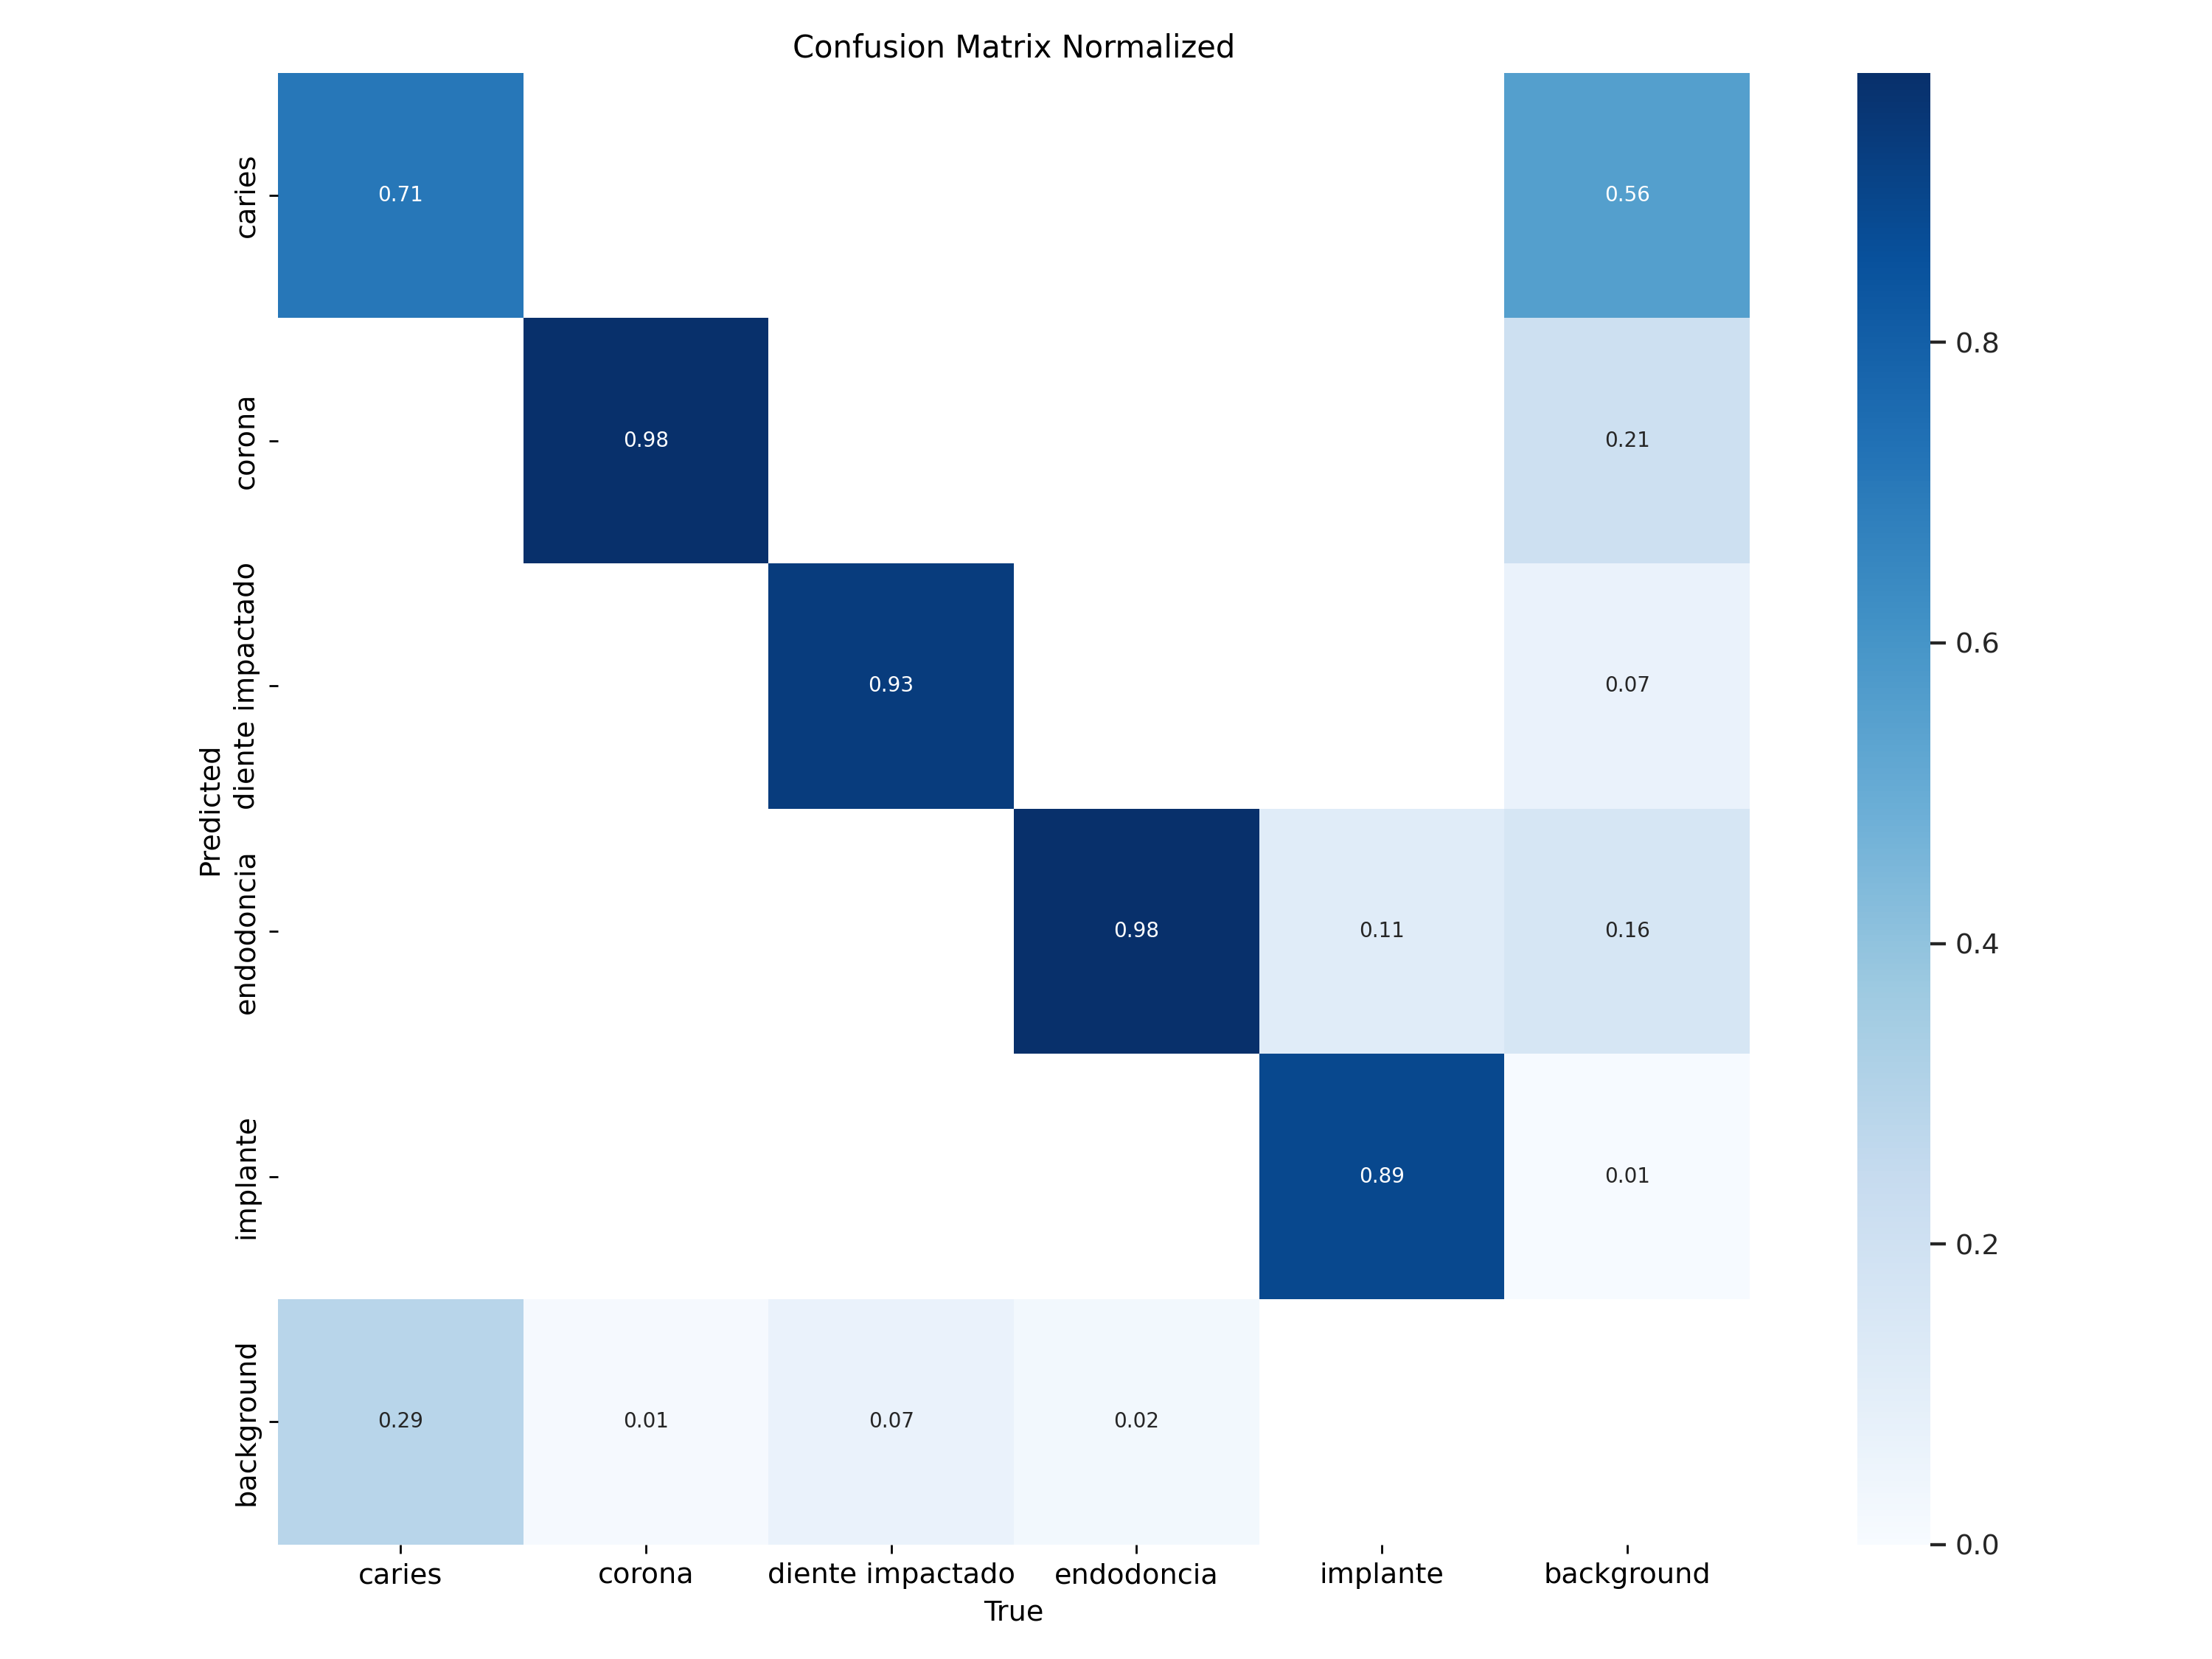

### Notas parciales

```
Model Summary (fused):
- **Layers**: 186
- **Parameters**: 2,685,343
- **Gradients**: 0
- **GFLOPs**: 6.8

| Class             | Images | Instances | Box(P) | R    | mAP50 | mAP50-95 |
|-------------------|--------|-----------|--------|------|-------|----------|
| **all**           | 161    | 869       | 0.775  | 0.851| 0.854 | 0.548    |
| **caries**        | 100    | 271       | 0.573  | 0.514| 0.574 | 0.342    |
| **corona**        | 50     | 290       | 0.832  | 0.979| 0.968 | 0.627    |
| **diente impactado** | 44  | 88        | 0.771  | 0.882| 0.859 | 0.638    |
| **endodoncia**    | 85     | 211       | 0.804  | 0.938| 0.907 | 0.458    |
| **implante**      | 3      | 9         | 0.894  | 0.943| 0.962 | 0.674    |

```

A primera vista, podemos observar que, a diferencia del entrenamiento con el conjunto de datos anterior, donde utilizamos exactamente los mismos parámetros, el mAP50 ha mejorado significativamente, pasando de 0.497 a 0.854 en este caso. Este resultado refuerza nuestra hipótesis inicial de que el conjunto de datos anterior contenía etiquetas incorrectas, afectando así el rendimiento del modelo.

## Entrenamiento con capas congeladas

In [77]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

n_layers_to_freeze = 10
for i, layer in enumerate(model.model.parameters()):
    if i < n_layers_to_freeze:
        layer.requires_grad = False

# Configurar el entrenamiento
model.train(
    data=data_path_yolo_2,  # Ruta al archivo .yaml
    epochs=50,
    imgsz=640,
    batch=32,
    save=True,
    patience=10,
    dropout=0.3,
    project=checkpoint_dir_yolo_2,
    augment=True,
    fliplr=0.5,
    flipud=0.5,
    freeze=n_layers_to_freeze  # Indicar el número de capas congeladas
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_2/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_2/, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning /content/datasets/datasets_yolo_2/train/labels.cache... 564 images, 44 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/datasets_yolo_2/valid/labels.cache... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to /content/vpc/checkpoints/datasets_yolo_2/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_2/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.28G      2.374      4.567      1.587        214        640: 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


                   all        161        869          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.02G      1.916      3.761      1.209        204        640: 100%|██████████| 18/18 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all        161        869    0.00204      0.095     0.0531     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.99G      1.839      2.944      1.142        263        640: 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all        161        869   0.000622     0.0315    0.00364    0.00242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.87G      1.765      2.468      1.123        250        640: 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


                   all        161        869    0.00761       0.22      0.138     0.0792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.94G       1.71      2.283      1.122        185        640: 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]


                   all        161        869     0.0172      0.528      0.308      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.98G      1.715      2.078      1.125        244        640: 100%|██████████| 18/18 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all        161        869       0.87       0.15      0.405      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.02G      1.622      1.876      1.107        228        640: 100%|██████████| 18/18 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]


                   all        161        869       0.71      0.367      0.463      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.05G      1.627      1.842      1.094        149        640: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        161        869       0.69      0.415      0.477      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.21G      1.597      1.765      1.087        140        640: 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all        161        869      0.677      0.527      0.515      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.85G       1.54      1.665      1.083        210        640: 100%|██████████| 18/18 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all        161        869      0.644      0.538      0.523      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.77G      1.535       1.64      1.082        218        640: 100%|██████████| 18/18 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


                   all        161        869      0.693      0.542      0.538      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.05G       1.54      1.628      1.081        171        640: 100%|██████████| 18/18 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        161        869       0.69      0.545      0.551      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.99G      1.503      1.547      1.067        208        640: 100%|██████████| 18/18 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all        161        869      0.686      0.559      0.561      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.24G      1.523      1.528      1.077        202        640: 100%|██████████| 18/18 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


                   all        161        869      0.718      0.567      0.572      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.06G      1.509      1.446      1.067        206        640: 100%|██████████| 18/18 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]


                   all        161        869      0.717      0.534      0.576      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.01G      1.501      1.461      1.061        243        640: 100%|██████████| 18/18 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all        161        869      0.734      0.571      0.576      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.24G      1.473      1.439      1.062        180        640: 100%|██████████| 18/18 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        161        869      0.739      0.577      0.587      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.32G      1.484      1.433      1.049        206        640: 100%|██████████| 18/18 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all        161        869      0.722      0.592      0.583      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.81G      1.437      1.385      1.045        251        640: 100%|██████████| 18/18 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all        161        869      0.764      0.574      0.592      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.57G      1.483      1.393       1.06        217        640: 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]


                   all        161        869      0.742      0.573      0.593      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.9G      1.441      1.357      1.053        224        640: 100%|██████████| 18/18 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all        161        869      0.509      0.553      0.593      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.75G       1.46      1.366      1.044        199        640: 100%|██████████| 18/18 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all        161        869      0.746      0.593       0.62      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.92G       1.45      1.348       1.05        232        640: 100%|██████████| 18/18 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


                   all        161        869      0.757      0.559      0.614      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.92G      1.434      1.292      1.042        207        640: 100%|██████████| 18/18 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        161        869      0.758      0.578       0.63      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.06G      1.446      1.285      1.051        238        640: 100%|██████████| 18/18 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all        161        869      0.774      0.587      0.643      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.58G      1.428      1.297      1.043        197        640: 100%|██████████| 18/18 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all        161        869      0.761      0.595      0.656       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.63G      1.431      1.302      1.033        227        640: 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


                   all        161        869      0.761      0.593      0.685      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.91G      1.424      1.274       1.04        226        640: 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        161        869       0.76      0.596      0.666      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.94G      1.409      1.268      1.029        244        640: 100%|██████████| 18/18 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all        161        869       0.77      0.591      0.682        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.04G      1.414      1.254      1.035        211        640: 100%|██████████| 18/18 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all        161        869      0.618      0.755      0.721      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.92G      1.405      1.245      1.027        241        640: 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        161        869      0.615      0.746      0.722      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.47G      1.402      1.239      1.031        228        640: 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all        161        869      0.645       0.74      0.711      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.81G      1.413      1.241      1.024        184        640: 100%|██████████| 18/18 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all        161        869      0.644      0.772       0.75      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.14G      1.395      1.209      1.033        198        640: 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all        161        869      0.676      0.733      0.755      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.92G      1.396      1.189      1.015        227        640: 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


                   all        161        869      0.687      0.725      0.759      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.1G      1.383      1.155      1.023        165        640: 100%|██████████| 18/18 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all        161        869      0.715      0.775      0.783      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.83G      1.399      1.209      1.037        186        640: 100%|██████████| 18/18 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all        161        869      0.676      0.785      0.781      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.14G      1.379      1.154      1.015        206        640: 100%|██████████| 18/18 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all        161        869      0.706      0.765      0.791      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.47G      1.395      1.166      1.025        249        640: 100%|██████████| 18/18 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all        161        869      0.713      0.746      0.775      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.15G      1.375      1.167      1.018        314        640: 100%|██████████| 18/18 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        161        869      0.709      0.743      0.777       0.46


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.66G      1.412      1.316       1.07        107        640: 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        161        869      0.735       0.68      0.763       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.45G      1.376      1.238      1.042        145        640: 100%|██████████| 18/18 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]


                   all        161        869      0.742      0.662      0.751      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G      1.368      1.216      1.058        134        640: 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]


                   all        161        869      0.698       0.69      0.757       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.76G      1.364      1.185      1.054         88        640: 100%|██████████| 18/18 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        161        869      0.717      0.681      0.765      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.68G      1.362      1.193      1.047        159        640: 100%|██████████| 18/18 [00:03<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all        161        869      0.713       0.71      0.774      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.51G      1.365      1.187      1.047        128        640: 100%|██████████| 18/18 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]


                   all        161        869      0.715      0.705      0.779      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.79G      1.345      1.169      1.034        109        640: 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        161        869      0.663      0.756      0.792      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.69G      1.352      1.171      1.037         66        640: 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all        161        869      0.675      0.783      0.788      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.64G      1.342       1.13      1.039        110        640: 100%|██████████| 18/18 [00:03<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        161        869      0.684       0.76      0.791      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.69G      1.349      1.182      1.044        131        640: 100%|██████████| 18/18 [00:03<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all        161        869      0.672      0.768      0.795      0.478



50 epochs completed in 0.088 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train2/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train2/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_2/train2/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


                   all        161        869      0.736      0.708      0.785      0.482
                caries        100        271      0.511      0.365       0.44      0.265
                corona         50        290      0.781      0.966      0.952      0.607
      diente impactado         44         88       0.71      0.898      0.833       0.62
            endodoncia         85        211      0.676      0.787      0.793      0.373
              implante          3          9          1      0.523      0.908      0.543
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_2/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33ac1616f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [80]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

n_layers_to_freeze = 3
for i, layer in enumerate(model.model.parameters()):
    if i < n_layers_to_freeze:
        layer.requires_grad = False

# Configurar el entrenamiento
model.train(
    data=data_path_yolo_2,  # Ruta al archivo .yaml
    epochs=50,
    imgsz=640,
    batch=-1,
    save=True,
    patience=10,
    dropout=0.3,
    project=checkpoint_dir_yolo_2,
    augment=True,
    fliplr=0.5,
    flipud=0.5,
    freeze=n_layers_to_freeze  # Indicar el número de capas congeladas
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_2/data.yaml, epochs=50, time=None, patience=10, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_2/, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=3, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/datasets/datasets_yolo_2/train/labels.cache... 564 images, 44 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/datasets_yolo_2/valid/labels.cache... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to /content/vpc/checkpoints/datasets_yolo_2/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0006328125), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_2/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.18G      2.644      4.687      1.773        801        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all        161        869          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       9.3G      2.187      4.397      1.413        875        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all        161        869          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       9.2G      1.851        3.9      1.175        819        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all        161        869   0.000447     0.0159    0.00075     0.0003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.32G       1.72      3.422      1.102        722        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all        161        869    0.00169     0.0672    0.00161    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       9.5G      1.702      2.977      1.086        777        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all        161        869     0.0026      0.107    0.00198   0.000545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.1G      1.599       2.58       1.06        727        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all        161        869    0.00266      0.123    0.00233   0.000591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.06G      1.577      2.186      1.037        787        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all        161        869    0.00219      0.141    0.00417     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.59G      1.601      2.019      1.049        964        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all        161        869     0.0038      0.246     0.0646     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       8.9G      1.555      1.851      1.045        916        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all        161        869    0.00494      0.273      0.123     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.84G      1.512      1.699       1.04        825        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all        161        869    0.00551      0.259      0.151     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.99G      1.464      1.589      1.038        751        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        161        869     0.0101      0.416       0.28      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.75G      1.469      1.482      1.026        948        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all        161        869     0.0157      0.573      0.375      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.94G      1.454      1.519      1.047        787        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all        161        869     0.0159      0.582      0.398      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.53G      1.421      1.443      1.031        807        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all        161        869      0.942      0.211      0.377      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.63G      1.446      1.429      1.029        926        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all        161        869     0.0184      0.572      0.401      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.02G      1.419      1.384      1.027        842        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all        161        869      0.881      0.323      0.546      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.16G      1.426      1.362      1.024        818        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all        161        869      0.906      0.324      0.583      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.53G      1.403      1.327      1.023        896        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        161        869      0.839      0.484        0.6      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.46G      1.391      1.276      1.024        818        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all        161        869      0.812      0.503      0.612       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.1G      1.407      1.273      1.022        750        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all        161        869      0.788      0.495      0.616      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       9.5G      1.386      1.309      1.022        890        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all        161        869      0.795      0.489      0.595      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.96G      1.381      1.272      1.011        810        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        161        869      0.818      0.562      0.607      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.78G      1.378      1.241      1.018        917        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all        161        869       0.87      0.553      0.631      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.89G      1.389       1.23      1.023        793        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all        161        869      0.823      0.581      0.649      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.96G      1.393      1.232      1.013        828        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all        161        869      0.829      0.563      0.659      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.64G      1.374      1.202       1.01        852        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all        161        869      0.746      0.608      0.653      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.36G      1.344      1.151     0.9989        910        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all        161        869      0.677      0.679      0.786      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.76G      1.355      1.178       1.01        860        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all        161        869      0.674      0.748      0.778      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       9.2G      1.359      1.164      1.004        824        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        161        869      0.645      0.693      0.768       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.91G      1.343      1.144      1.006        834        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all        161        869      0.632      0.706      0.771      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         9G      1.358      1.149      1.006        849        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all        161        869      0.635      0.757      0.787      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.02G      1.337      1.112      1.004        715        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all        161        869      0.725      0.788      0.812      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.51G       1.32      1.073     0.9953        826        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all        161        869      0.745      0.794       0.83      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.83G      1.319      1.114     0.9925        703        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all        161        869       0.75       0.82      0.821      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.01G      1.303      1.093     0.9962        776        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all        161        869      0.793      0.797      0.828      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.43G      1.312      1.057     0.9927        738        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all        161        869      0.768       0.82      0.823      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.35G      1.297      1.056     0.9873        791        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all        161        869      0.785      0.807      0.829      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.25G      1.296      1.052     0.9954        838        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all        161        869      0.798      0.802      0.834      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.85G      1.284      1.055     0.9819        843        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all        161        869      0.784      0.814      0.831       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.34G      1.281      1.033     0.9869        768        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all        161        869      0.792      0.813      0.836      0.534


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.06G      1.319      1.135      1.027        466        640: 100%|██████████| 7/7 [00:09<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all        161        869      0.815      0.752       0.82      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.51G        1.3        1.1      1.012        423        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all        161        869      0.821      0.771      0.819      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.72G      1.268      1.053      1.009        410        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all        161        869      0.804      0.811      0.839      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       8.8G      1.267      1.028      1.007        430        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all        161        869      0.815      0.785      0.836      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       8.7G      1.247      1.019     0.9887        393        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all        161        869      0.795        0.8      0.839      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.94G      1.237      1.004     0.9946        420        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all        161        869       0.81      0.806      0.843      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.49G      1.238     0.9944     0.9931        481        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all        161        869      0.778      0.826      0.837      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.53G      1.257      1.009      1.006        421        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all        161        869      0.778      0.825      0.836      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.49G      1.246     0.9804     0.9882        471        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all        161        869      0.795      0.816      0.835      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.39G      1.223     0.9845     0.9838        456        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all        161        869       0.81      0.808      0.837       0.53
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



50 epochs completed in 0.085 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train3/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_2/train3/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_2/train3/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


                   all        161        869      0.811      0.805      0.838      0.542
                caries        100        271      0.638      0.395      0.508      0.297
                corona         50        290      0.893      0.969      0.973      0.622
      diente impactado         44         88      0.734      0.807      0.835      0.602
            endodoncia         85        211      0.835      0.853      0.877      0.442
              implante          3          9      0.956          1      0.995      0.747
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_2/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33c67cdb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

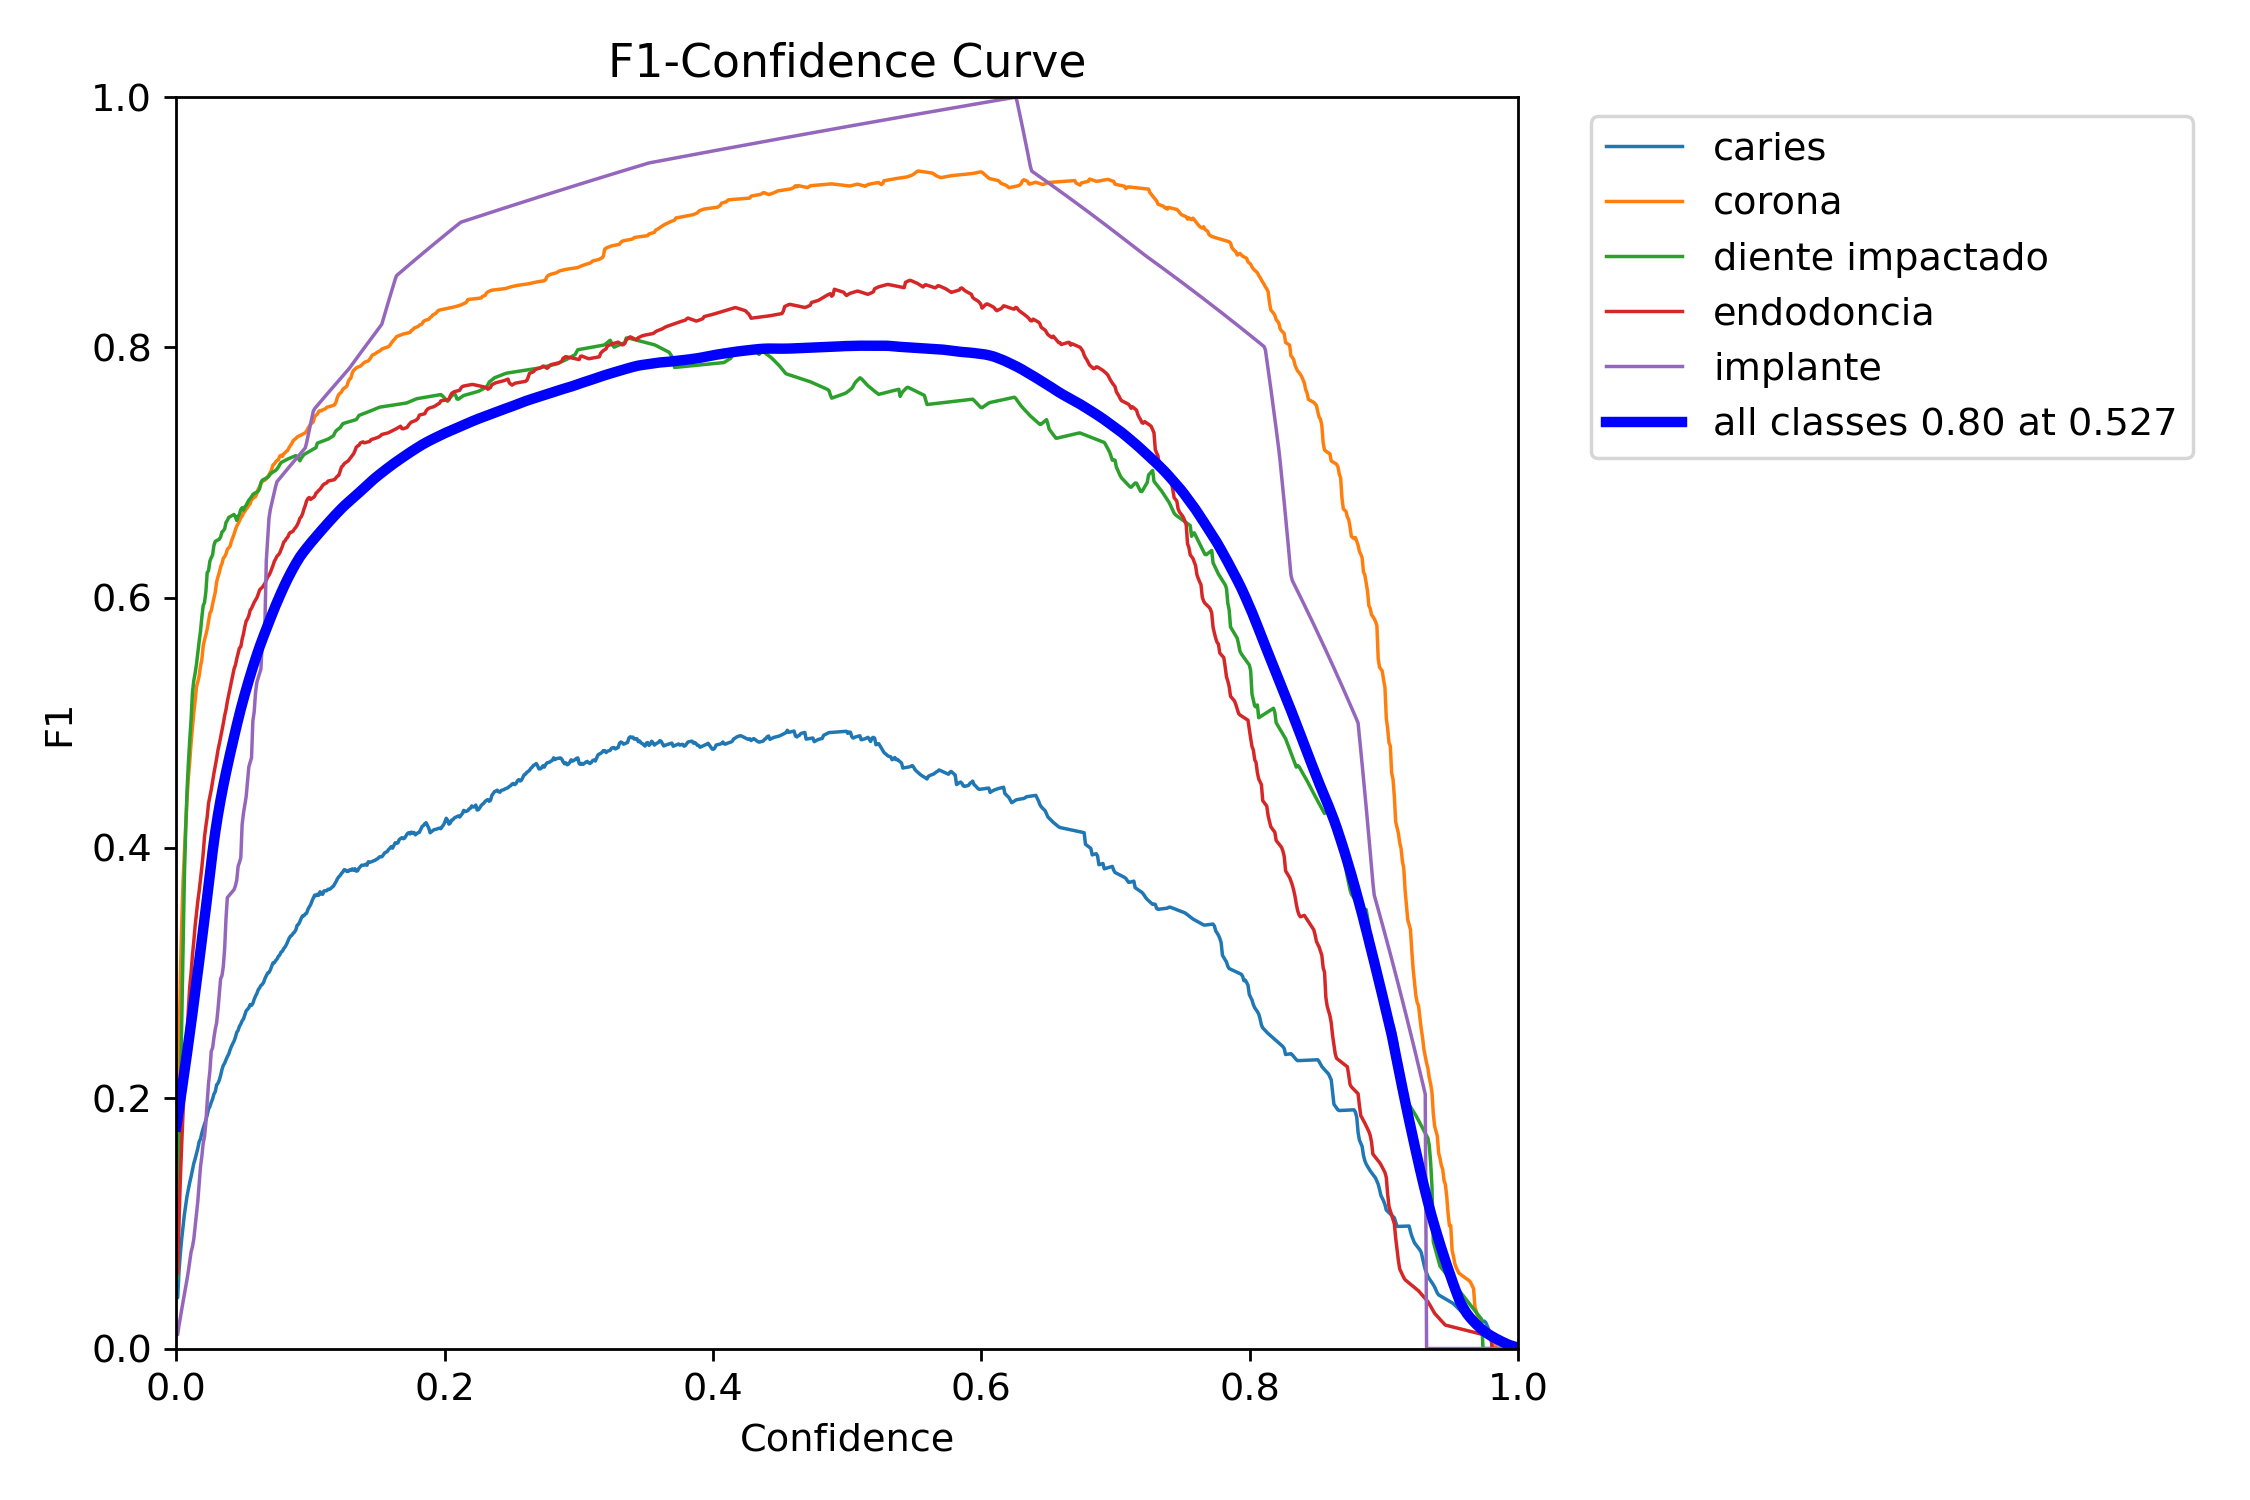

### Notas parciales

Hemos realizado dos entrenamientos para implementar Transfer Learning, aprovechando las características de las primeras capas de la red. En el segundo entrenamiento, se observó una mejora significativa al reducir la cantidad de capas congeladas, lo que permitió a la red generalizar mejor y obtener resultados casi equivalentes a los del modelo entrenado desde cero.

```
Model summary (fused):
Layers: 186
Parameters: 2,685,343
Gradients: 0
GFLOPs: 6.8

| Class                | Images | Instances | Box(P) | R    | mAP50 | mAP50-95 |
|----------------------|--------|-----------|--------|------|-------|----------|
| **all**              | 161    | 869       | 0.811  | 0.805| 0.838 | 0.542    |
| **caries**           | 100    | 271       | 0.638  | 0.395| 0.508 | 0.297    |
| **corona**           | 50     | 290       | 0.893  | 0.969| 0.973 | 0.622    |
| **diente impactado** | 44     | 88        | 0.734  | 0.807| 0.835 | 0.602    |
| **endodoncia**       | 85     | 211       | 0.835  | 0.853| 0.877 | 0.442    |
| **implante**         | 3      | 9         | 0.956  | 1.000| 0.995 | 0.747    |

```

## Conclusiones

En este análisis, hemos estado probando diferentes modelos, incluidos algunos más pequeños, como el modelo nano. Las imágenes de las curvas de F1 score y la matriz de confusión que hemos adjuntado muestran claramente cómo se están desempeñando nuestros modelos en cuanto a precisión y capacidad de detección.

Si bien la corrección del dataset nos ayudo a mejorar muchisimo la performance del modelo, hay que tener en cuenta que todavía tenemos algunos problemas, sobre todo con la identificación de caries, ya que a menudo se confunden con el fondo en las imágenes.

Por eso, es importante seguir trabajando en nuestros modelos. Algunas ideas para mejorar incluyen usar técnicas de data augmentation más avanzadas, mejorar las anotaciones del dataset y explorar redes más complejas. Con estos ajustes, estamos seguros de que podremos optimizar la detección de caries y hacer que nuestros modelos sean aún más efectivos.

En la sección a continuacion haremos uso de un dataset con data augmentation que nos incluye mas de 1800 imagenes.


----
# DATASETS YOLO 3

En esta sección, llevaremos a cabo el entrenamiento de un modelo YOLOv11 para la detección de objetos en el siguiente dataset dental:

- [DATASET YOLO 3](https://drive.google.com/file/d/1FXwVjAe0r0Moc8egK6FBZhoaXWtNeOCB/view?usp=drive_link)

## Entrenamiento inicial

In [81]:
# Definir la ruta donde se guardarán los checkpoints en Drive
checkpoint_dir_parent = '/content/vpc/checkpoints/'

In [82]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_parent, exist_ok=True)

In [83]:
# Definir la ruta donde se guardarán los checkpoints en Drive para el datasets original
checkpoint_dir_yolo_3 = checkpoint_dir_parent+"datasets_yolo_3/"
checkpoint_dir_yolo_3

'/content/vpc/checkpoints/datasets_yolo_3/'

In [84]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_yolo_3, exist_ok=True)

In [85]:
# Carpeta padre de los datasets
datasets_parent_dir

'/content/datasets/'

In [86]:
data_path_yolo_3 = os.path.join(datasets_parent_dir, 'datasets_yolo_3/data.yaml')
data_path_yolo_3

'/content/datasets/datasets_yolo_3/data.yaml'

In [87]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

model.train(
    data=data_path_yolo_3,  # Ruta al archivo .yaml
    epochs=50,        # Número de épocas
    imgsz=640,        # Tamaño de la imagen
    batch=32,         # Tamaño del batch
    save=True,        # Guardar los checkpoints
    patience=10,      # Early stopping
    dropout=0.3,      # Dropout durante el entrenamiento
    project=checkpoint_dir_yolo_3,  # Carpeta de salida
    augment=True,     # data augmentation
    fliplr=0.5,
    flipud=0.5
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets_yolo_3/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_3/, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/datasets/datasets_yolo_3/train/labels... 1692 images, 132 backgrounds, 0 corrupt: 100%|██████████| 1692/1692 [00:01<00:00, 1166.36it/s]

train: New cache created: /content/datasets/datasets_yolo_3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/datasets_yolo_3/valid/labels... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 931.80it/s]

val: New cache created: /content/datasets/datasets_yolo_3/valid/labels.cache


Plotting labels to /content/vpc/checkpoints/datasets_yolo_3/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_3/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.12G      2.115       3.79      1.406        225        640: 100%|██████████| 53/53 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]


                   all        161        869    0.00105      0.039     0.0043    0.00139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.09G      1.688      1.982       1.13        277        640: 100%|██████████| 53/53 [00:16<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all        161        869      0.848      0.238      0.446       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.47G      1.579      1.609       1.11        278        640: 100%|██████████| 53/53 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        161        869       0.65      0.532      0.505      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.33G      1.516      1.461        1.1        303        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


                   all        161        869      0.726      0.527      0.558      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.19G      1.466      1.377      1.081        260        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        161        869      0.755      0.555      0.644      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.15G      1.469      1.291      1.082        296        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all        161        869      0.736      0.563      0.644      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.1G      1.421      1.205      1.066        257        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all        161        869      0.655      0.751      0.746      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.29G       1.42      1.165      1.068        296        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all        161        869      0.804       0.76      0.829      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       5.2G      1.393      1.144      1.056        234        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all        161        869      0.738      0.795       0.83      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.27G      1.391      1.089      1.058        318        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        161        869      0.826      0.819      0.843      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.22G      1.367      1.052      1.047        300        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all        161        869      0.831      0.751      0.834       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.19G      1.352       1.04      1.042        299        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


                   all        161        869      0.713      0.837       0.84        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.91G      1.353      1.025      1.046        327        640: 100%|██████████| 53/53 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all        161        869      0.772      0.861      0.855      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.43G      1.332     0.9978      1.041        294        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all        161        869      0.776      0.802       0.84      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.11G      1.324     0.9712      1.034        338        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all        161        869      0.791      0.791      0.829      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.7G      1.318     0.9534      1.036        263        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all        161        869      0.812      0.823      0.852      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.3G       1.32     0.9472      1.034        234        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all        161        869      0.811      0.845      0.853      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.05G      1.312     0.9204      1.029        246        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all        161        869      0.808      0.801      0.843      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.15G      1.304     0.9174      1.025        272        640: 100%|██████████| 53/53 [00:16<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        161        869       0.81      0.851       0.86      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.24G      1.294     0.9053       1.02        306        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all        161        869      0.798      0.846      0.859      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.87G      1.288     0.9049      1.021        417        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


                   all        161        869      0.804      0.734      0.829      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.62G      1.289     0.8844      1.018        273        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all        161        869       0.82      0.818      0.846      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.62G       1.27     0.8616       1.01        292        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all        161        869       0.79      0.844      0.858      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.23G      1.258     0.8589      1.016        273        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        161        869      0.838      0.796      0.851      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.99G      1.259     0.8563       1.01        296        640: 100%|██████████| 53/53 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all        161        869      0.811      0.779      0.841      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.4G      1.249     0.8412      1.007        262        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all        161        869      0.835      0.763      0.837       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.14G      1.236     0.8464      1.006        300        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all        161        869      0.826      0.816      0.849      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.86G      1.228     0.8196      1.003        242        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all        161        869      0.823      0.799      0.851      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.24G      1.226      0.817     0.9993        248        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all        161        869      0.818      0.848       0.86      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.97G      1.215     0.8122     0.9933        287        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all        161        869      0.816      0.788      0.847      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.31G      1.217     0.7916     0.9966        330        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all        161        869      0.809      0.857       0.86      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.39G      1.213     0.7886     0.9922        262        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all        161        869      0.862      0.798       0.86      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.67G      1.193     0.7662     0.9936        288        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all        161        869      0.824      0.827      0.856      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.12G       1.19     0.7729     0.9862        350        640: 100%|██████████| 53/53 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


                   all        161        869      0.839      0.825      0.858       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.55G      1.182     0.7588     0.9858        270        640: 100%|██████████| 53/53 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        161        869      0.809      0.826      0.854      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.02G       1.18     0.7605     0.9862        264        640: 100%|██████████| 53/53 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        161        869       0.79      0.812      0.849      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.21G      1.182     0.7582     0.9864        364        640: 100%|██████████| 53/53 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all        161        869      0.835      0.779       0.84      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.81G      1.183     0.7529     0.9842        208        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all        161        869      0.833      0.791      0.851      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.14G      1.167      0.742     0.9786        281        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all        161        869      0.811      0.838      0.854      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.67G       1.16     0.7324     0.9745        290        640: 100%|██████████| 53/53 [00:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all        161        869      0.798       0.86      0.854      0.548


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.75G      1.157     0.7466      0.994        165        640: 100%|██████████| 53/53 [00:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all        161        869      0.816      0.796      0.833      0.531
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 31, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.215 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/train/weights/last.pt, 5.6MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/train/weights/best.pt, 5.6MB

Validating /content/vpc/checkpoints/datasets_yolo_3/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


                   all        161        869      0.838       0.84      0.865      0.549
                caries        100        271      0.763      0.392      0.587      0.358
                corona         50        290      0.908      0.966      0.978      0.645
      diente impactado         44         88      0.734      0.898      0.855      0.626
            endodoncia         85        211      0.789      0.943       0.91       0.48
              implante          3          9      0.997          1      0.995      0.637
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_3/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b335a1fdb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### Notas parciales

```
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs
| Class                  | Images | Instances | Box(P) | R    | mAP50 | mAP50-95 |
|------------------------|--------|-----------|--------|------|-------|----------|
| **all**                | 161    | 869       | 0.838  | 0.84 | 0.865 | 0.549    |
| **caries**             | 100    | 271       | 0.763  | 0.392| 0.587 | 0.358    |
| **corona**             | 50     | 290       | 0.908  | 0.966| 0.978 | 0.645    |
| **diente impactado**   | 44     | 88        | 0.734  | 0.898| 0.855 | 0.626    |
| **endodoncia**         | 85     | 211       | 0.789  | 0.943| 0.910 | 0.480    |
| **implante**           | 3      | 9         | 0.997  | 1.00 | 0.995 | 0.637    |

```

A simple vista, podemos ver que los resultados en cuanto a métricas finales son similares a los obtenidos con el dataset anterior (DATASETS YOLO 2). Sin embargo, al observar más detenidamente, se aprecia una mejora significativa en el tiempo de convergencia del modelo. Mientras que en el otro dataset la red tardó hasta las épocas 25-27 en alcanzar un mAP50 de alrededor de 0.8, en este caso lo hizo en solo 8 épocas. Este avance demuestra cómo la calidad de los datos contribuye directamente a la velocidad de convergencia.

A continuación, probaremos un modelo con más parámetros para evaluar si esto mejora la capacidad de generalización del modelo.

### Entrenamiento modelo YOLOv8 - generacion s

In [88]:
# Definir la ruta donde se guardarán los checkpoints en Drive
checkpoint_dir_parent = '/content/vpc/checkpoints/'

In [89]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_parent, exist_ok=True)

In [90]:
# Definir la ruta donde se guardarán los checkpoints en Drive para el datasets original
checkpoint_dir_yolo_3_model_s = checkpoint_dir_parent+"datasets_yolo_3/model_s"
checkpoint_dir_yolo_3_model_s

'/content/vpc/checkpoints/datasets_yolo_3/model_s'

In [91]:
# Crear la carpeta en caso de que no exista
os.makedirs(checkpoint_dir_yolo_3_model_s, exist_ok=True)

In [92]:
# Carpeta padre de los datasets
datasets_parent_dir

'/content/datasets/'

In [93]:
data_path_yolo_3 = os.path.join(datasets_parent_dir, 'datasets_yolo_3/data.yaml')
data_path_yolo_3

'/content/datasets/datasets_yolo_3/data.yaml'

In [94]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8s.pt')

model.train(
    data=data_path_yolo_3,  # Ruta al archivo .yaml
    epochs=50,        # Número de épocas
    imgsz=640,        # Tamaño de la imagen
    batch=32,         # Tamaño del batch
    save=True,        # Guardar los checkpoints
    patience=10,      # Early stopping
    dropout=0.3,      # Dropout durante el entrenamiento
    project=checkpoint_dir_yolo_3_model_s,  # Carpeta de salida
    augment=True,     # data augmentation
    fliplr=0.5,
    flipud=0.5
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 294MB/s]


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/datasets_yolo_3/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_3/model_s, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning /content/datasets/datasets_yolo_3/train/labels.cache... 1692 images, 132 backgrounds, 0 corrupt: 100%|██████████| 1692/1692 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/datasets_yolo_3/valid/labels.cache... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to /content/vpc/checkpoints/datasets_yolo_3/model_s/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_3/model_s/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.24G      2.031       3.34      1.404        225        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        161        869    0.00141      0.128    0.00696    0.00187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.29G      1.572      1.613      1.139        277        640: 100%|██████████| 53/53 [00:27<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        161        869     0.0156      0.703      0.426      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       8.1G      1.486      1.371      1.114        278        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all        161        869      0.755      0.591      0.589      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.16G      1.465      1.261      1.109        303        640: 100%|██████████| 53/53 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        161        869      0.787      0.594      0.704      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.28G      1.394      1.155      1.079        260        640: 100%|██████████| 53/53 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        161        869      0.774      0.799      0.826      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       8.3G      1.408      1.101      1.088        296        640: 100%|██████████| 53/53 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        161        869      0.813      0.735      0.823      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.09G      1.366       1.03      1.071        257        640: 100%|██████████| 53/53 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        161        869      0.788      0.875      0.859      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       8.2G      1.369     0.9979      1.075        296        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        161        869      0.823      0.849      0.873      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.07G      1.341     0.9825      1.061        234        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        161        869      0.732       0.86      0.847      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.43G      1.324     0.9481      1.057        318        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        161        869      0.795      0.831      0.834       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.37G      1.318     0.9084      1.048        300        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        161        869      0.773      0.797      0.827      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       8.2G      1.296      0.899      1.045        299        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        161        869      0.793      0.847      0.854      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.05G      1.284     0.8778      1.045        327        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        161        869      0.812      0.823      0.863      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.16G      1.275     0.8562      1.046        294        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        161        869      0.778      0.815      0.839       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.96G      1.265     0.8356      1.037        338        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        161        869      0.815      0.786      0.831      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.23G      1.255     0.8153      1.038        263        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        161        869      0.789       0.87      0.853      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.04G      1.253     0.8124      1.035        234        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        161        869      0.754       0.79      0.828      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.98G      1.246     0.7923       1.03        246        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        161        869      0.783      0.777      0.829      0.503
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



18 epochs completed in 0.159 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/model_s/train/weights/last.pt, 19.9MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/model_s/train/weights/best.pt, 19.9MB

Validating /content/vpc/checkpoints/datasets_yolo_3/model_s/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


                   all        161        869       0.81      0.838      0.863      0.533
                caries        100        271      0.723      0.404      0.591      0.353
                corona         50        290      0.886      0.934      0.962      0.624
      diente impactado         44         88      0.758      0.926      0.867      0.571
            endodoncia         85        211      0.793      0.929        0.9      0.478
              implante          3          9      0.893          1      0.995      0.639
Speed: 0.1ms preprocess, 9.2ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_3/model_s/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b3369c656c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [95]:
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8s.pt')

model.train(
    data=data_path_yolo_3,  # Ruta al archivo .yaml
    epochs=50,        # Número de épocas
    imgsz=1280,        # Tamaño de la imagen
    rect=True,
    batch=-1,         # Tamaño del batch
    save=True,        # Guardar los checkpoints
    patience=10,      # Early stopping
    dropout=0.3,      # Dropout durante el entrenamiento
    project=checkpoint_dir_yolo_3_model_s,  # Carpeta de salida
    augment=True,     # data augmentation
    fliplr=0.5,
    flipud=0.5
)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/datasets_yolo_3/data.yaml, epochs=50, time=None, patience=10, batch=-1, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/vpc/checkpoints/datasets_yolo_3/model_s, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /content/datasets/datasets_yolo_3/train/labels.cache... 1692 images, 132 backgrounds, 0 corrupt: 100%|██████████| 1692/1692 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /content/datasets/datasets_yolo_3/valid/labels.cache... 161 images, 9 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to /content/vpc/checkpoints/datasets_yolo_3/model_s/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0004921875), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/vpc/checkpoints/datasets_yolo_3/model_s/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.98G      1.778      3.321      1.585         33       1280: 100%|██████████| 188/188 [00:55<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        161        869      0.595      0.491      0.388      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.76G      1.608      2.169      1.443         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        161        869      0.628      0.485      0.455      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.01G      1.594      1.853       1.44         28       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        161        869       0.61      0.514      0.474      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.82G      1.549      1.618      1.413         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        161        869      0.695      0.554      0.572      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.82G      1.515      1.461      1.413         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        161        869      0.705      0.518      0.546      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.78G      1.498      1.375      1.388         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        161        869      0.727      0.545      0.587       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.57G      1.476      1.294      1.387         35       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        161        869      0.751      0.533       0.58      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       7.8G       1.45      1.207      1.375         31       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        161        869      0.798       0.61      0.724      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.53G      1.438      1.156      1.355         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]

                   all        161        869      0.756      0.679      0.773      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.63G       1.41      1.115      1.345         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        161        869      0.661      0.826      0.828      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.82G      1.395      1.084      1.344         35       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        161        869      0.779      0.744       0.76      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.79G      1.385      1.044      1.344         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        161        869      0.794       0.85      0.852      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.01G       1.36      1.022      1.327         36       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        161        869      0.791      0.829      0.848       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.56G      1.338     0.9835      1.318         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        161        869      0.763      0.858      0.861      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.81G      1.332     0.9554      1.309         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]

                   all        161        869      0.799      0.846      0.863      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.74G      1.308     0.9351      1.291         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        161        869      0.802      0.837      0.855      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.54G      1.301     0.9089      1.289         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]

                   all        161        869      0.811      0.753      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.82G      1.316      0.897      1.309         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        161        869      0.834      0.782      0.857      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.79G      1.285     0.8752      1.282         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        161        869      0.741      0.772      0.802      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.01G      1.279      0.849      1.288         35       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        161        869      0.808      0.876      0.875      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.57G      1.265     0.8352      1.279         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        161        869      0.798      0.869      0.862      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.79G      1.241     0.8258      1.265         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        161        869      0.797      0.874      0.856      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.97G      1.251     0.7988      1.266         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        161        869       0.81      0.842      0.864      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       7.5G      1.243     0.7792      1.269         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        161        869      0.808      0.815      0.849      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.82G      1.231      0.773      1.252         35       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        161        869      0.805      0.855      0.865      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.79G      1.215     0.7629      1.246         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        161        869      0.806      0.862      0.871      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.01G      1.185     0.7458      1.231         33       1280: 100%|██████████| 188/188 [00:52<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]

                   all        161        869      0.826       0.82      0.858      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.56G      1.169      0.725      1.228         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        161        869      0.782      0.835      0.854       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.79G      1.156     0.7189      1.211         31       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        161        869      0.842      0.832      0.866      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.71G      1.148      0.698       1.21         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        161        869      0.802      0.842      0.855      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.63G      1.149     0.6853      1.211         36       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        161        869      0.832      0.841      0.856      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.82G      1.137     0.6657      1.199         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        161        869      0.806      0.858      0.852       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       7.7G      1.125      0.663      1.197         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        161        869      0.817      0.832      0.852      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.01G      1.112     0.6512      1.186         32       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        161        869      0.808       0.88      0.865      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.56G      1.128       0.64      1.197         35       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        161        869      0.776      0.863       0.87      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.79G      1.123     0.6317      1.197         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        161        869      0.838       0.86       0.87      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.71G      1.114     0.6178      1.185         34       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        161        869      0.832      0.843       0.87      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.63G      1.115     0.6071      1.185         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]

                   all        161        869      0.809       0.86      0.863       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.82G      1.076     0.6051      1.164         33       1280: 100%|██████████| 188/188 [00:53<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        161        869      0.819      0.822      0.866       0.55
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 29, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



39 epochs completed in 0.613 hours.
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/model_s/train2/weights/last.pt, 20.0MB
Optimizer stripped from /content/vpc/checkpoints/datasets_yolo_3/model_s/train2/weights/best.pt, 20.0MB

Validating /content/vpc/checkpoints/datasets_yolo_3/model_s/train2/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]


                   all        161        869      0.817      0.865      0.871      0.557
                caries        100        271      0.676      0.615      0.665      0.404
                corona         50        290      0.865      0.979       0.97      0.634
      diente impactado         44         88      0.747       0.92      0.851      0.606
            endodoncia         85        211      0.886      0.919      0.921      0.502
              implante          3          9      0.914      0.889      0.947      0.641
Speed: 0.4ms preprocess, 29.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/vpc/checkpoints/datasets_yolo_3/model_s/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b336814c850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

## Notas parciales

A continuacion presentamos los resultados que obtivos de los entrenamientos anteriores respectivamente:

```
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)
                   all        161        869       0.81      0.838      0.863      0.533
                caries        100        271      0.723      0.404      0.591      0.353
                corona         50        290      0.886      0.934      0.962      0.624
      diente impactado         44         88      0.758      0.926      0.867      0.571
            endodoncia         85        211      0.793      0.929        0.9      0.478
              implante          3          9      0.893          1      0.995      0.639

```

Y para en segundo caso donde el tamaño de la imagen fue de 1280 px es:

```
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)
                   all        161        869      0.817      0.865      0.871      0.557
                caries        100        271      0.676      0.615      0.665      0.404
                corona         50        290      0.865      0.979       0.97      0.634
      diente impactado         44         88      0.747       0.92      0.851      0.606
            endodoncia         85        211      0.886      0.919      0.921      0.502
              implante          3          9      0.914      0.889      0.947      0.641

```


De los resultados que obtivmos podemos notar que:

- Con imágenes más grandes (1280x1280), el modelo mostró una leve mejora en métricas como Precision y mAP50 en algunas clases. Por ejemplo, en "endodoncia", la Precision subió de 0.793 a 0.886, y en "implante", pasó de 0.893 a 0.914.

- El Recall también mejoró sobre todo para caries.

- En general, entrenar con imágenes más grandes llevó a un mejor desempeño en la mayoría de las clases, aunque no en todas.


A raiz de estos puntos podemos a priori pensar que imagenes mas grandes captura mas informacion (o caracterisicas) del problema lo que es beneficioso para nosotros.

Por ultimo si tomamos el entrenamiento con la red nano anterior con un tamaño de 640 podemos ver que:

```
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)
                   all        161        869      0.838       0.84      0.865      0.549
                caries        100        271      0.763      0.392      0.587      0.358
                corona         50        290      0.908      0.966      0.978      0.645
      diente impactado         44         88      0.734      0.898      0.855      0.626
            endodoncia         85        211      0.789      0.943       0.91       0.48
              implante          3          9      0.997          1      0.995      0.637

```

- Aunque el modelo YOLOv8n tiene menos parámetros (2.7M frente a 9.8M del YOLOv8s), la diferencia en rendimiento no fue tan grande.

- En algunas clases, como "implante", YOLOv8n incluso alcanzó mejor Precision (0.997 vs 0.893).

- Sin embargo, para otras clases como "caries", YOLOv8s mantuvo mejores resultados en términos de mAP50 (0.591 vs 0.587).

# Conclusión:

- Datos de calidad y correctas etiquetas garantizan un mejor modelo sobre cualquier arquitectura.

- Imágenes de mayor resolución (1280x1280) parecen ser beneficiosas en general, mejorando ligeramente las métricas de rendimiento.

- YOLOv8n aunque más pequeño, no se queda atrás, y puede ser una opción más ligera y eficiente si el hardware o el tiempo de entrenamiento son limitados.

- Modelos con mayores parametros y mayores resolución pueden alcanzar mejores resultados probablemten, pero muy cercanos a los alcanzados

# Inferencia sobre DATASET 3

In [118]:
import random
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Colores aleatorios para las clases
def get_random_color():
    return tuple(random.choices(range(256), k=3))

def plot_image_with_boxes(image, boxes, labels, confidences):
    """
    Función para mostrar y guardar las imágenes con bounding boxes.
    """
    img = image.copy()
    for box, label, conf in zip(boxes, labels, confidences):
        color = get_random_color()  # Asignar un color aleatorio a cada etiqueta
        x1, y1, x2, y2 = map(int, box)
        # Dibujar el bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        # Añadir la etiqueta con el porcentaje de confianza
        label_text = f"{label} ({conf*100:.2f}%)"
        cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    return img

def select_random_images(image_folder, n_images=5):
    """
    Selecciona imágenes aleatorias de una carpeta.

    Args:
        image_folder: Carpeta donde se encuentran las imágenes.
        n_images: Número de imágenes a seleccionar aleatoriamente.

    Returns:
        Una lista con los nombres de las imágenes seleccionadas.
    """
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    return random.sample(image_files, min(n_images, len(image_files)))

def run_inference(model_path, image_folder, image_files, save_folder, threshold=0.5):
    """
    Realiza inferencia con YOLO y guarda imágenes con bounding boxes.

    Args:
        model_path: Ruta al modelo YOLO.
        image_folder: Carpeta de imágenes.
        image_files: Lista de nombres de imágenes para la inferencia.
        save_folder: Carpeta donde guardar las imágenes procesadas.
        threshold: Umbral de confianza para detecciones.
    """
    # Cargar el modelo
    model = YOLO(model_path)

    # Crear carpeta de salida si no existe
    os.makedirs(save_folder, exist_ok=True)

    for image_file in image_files:
        # Construir la ruta completa de la imagen
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)

        # Realizar inferencia
        results = model(img)

        # Extraer las predicciones por cada resultado
        pred_boxes, pred_labels, pred_confs = [], [], []
        for r in results:
            for bbox, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
                if conf > threshold:
                    pred_boxes.append(bbox)
                    pred_labels.append(model.names[int(cls)])
                    pred_confs.append(conf)

        # Dibujar y mostrar la imagen con los bounding boxes, etiquetas y confianza
        processed_img = plot_image_with_boxes(img, pred_boxes, pred_labels, pred_confs)
        plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Guardar la imagen procesada
        save_path = os.path.join(save_folder, f"pred_{image_file}")
        cv2.imwrite(save_path, processed_img)
        print(f"Imagen guardada en: {save_path}")

In [98]:
# Definir la ruta donde se guardarán los resultados del modelo
results_dir_parent = '/content/vpc/results/'

In [100]:
# Crear la carpeta en caso de que no exista
os.makedirs(results_dir_parent, exist_ok=True)

In [104]:
# Definir la ruta donde se guardarán los resultados del modelo para el modelo datastes 3
results_dir_yolo_3_model_s_1280 = results_dir_parent+"datasets_yolo_3/model_s_1280"
results_dir_yolo_3_model_s_1280

'/content/vpc/results/datasets_yolo_3/model_s_1280'

In [105]:
# Crear la carpeta en caso de que no exista
os.makedirs(results_dir_yolo_3_model_s_1280, exist_ok=True)

In [122]:
# CARPETA PARA LA SELECCION DE IMAGENES ALEATORIAS

image_folder = '/content/datasets/datasets_yolo_3/test/images/'
random_images = select_random_images(image_folder, n_images=5)

print(f"Imagenes donde se va a correr la inferencia")
[print(image) for image in random_images]

Imagenes donde se va a correr la inferencia
train_335_png_jpg.rf.0962a84a6c7b5f3745e962a5165cb2c7.jpg
train_426_png_jpg.rf.3114f603da98838285b868e67615be86.jpg
train_692_png_jpg.rf.892dd275f0dd55bbf0124beca680d37d.jpg
train_204_png_jpg.rf.48c2aef29b60a3906e1878e37ad37690.jpg
train_415_png_jpg.rf.030222fc1f6e1672459b2fa240915cab.jpg


[None, None, None, None, None]

## Inferencia para modelo S - 1280:

- modelo s 1280


0: 640x1280 2 cariess, 5 diente impactados, 27.4ms
Speed: 5.2ms preprocess, 27.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1280)


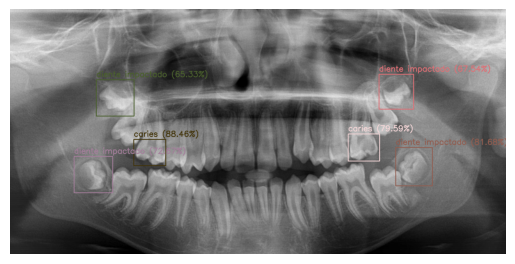

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_1280/pred_train_335_png_jpg.rf.0962a84a6c7b5f3745e962a5165cb2c7.jpg

0: 672x1280 3 cariess, 1 endodoncia, 27.3ms
Speed: 6.3ms preprocess, 27.3ms inference, 1.4ms postprocess per image at shape (1, 3, 672, 1280)


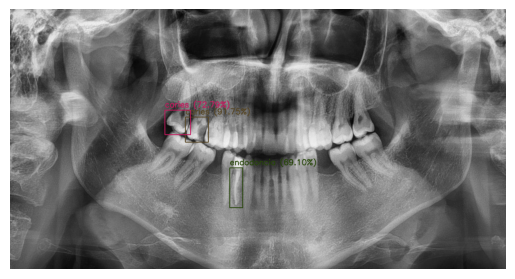

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_1280/pred_train_426_png_jpg.rf.3114f603da98838285b868e67615be86.jpg

0: 608x1280 1 caries, 26.2ms
Speed: 5.6ms preprocess, 26.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1280)


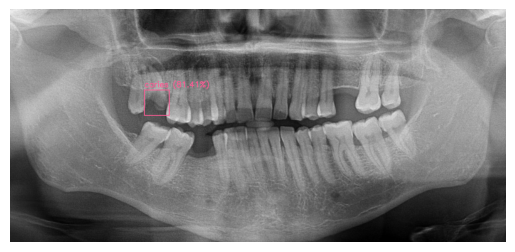

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_1280/pred_train_692_png_jpg.rf.892dd275f0dd55bbf0124beca680d37d.jpg

0: 608x1280 1 diente impactado, 24.8ms
Speed: 5.2ms preprocess, 24.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 1280)


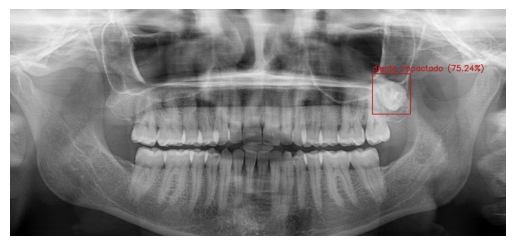

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_1280/pred_train_204_png_jpg.rf.48c2aef29b60a3906e1878e37ad37690.jpg

0: 576x1280 2 diente impactados, 1 endodoncia, 25.1ms
Speed: 5.0ms preprocess, 25.1ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 1280)


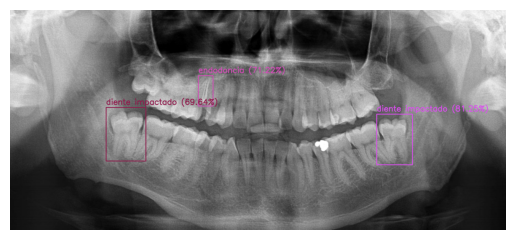

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_1280/pred_train_415_png_jpg.rf.030222fc1f6e1672459b2fa240915cab.jpg


In [123]:
run_inference('/content/vpc/checkpoints/datasets_yolo_3/model_s/train2/weights/best.pt', image_folder,random_images, results_dir_yolo_3_model_s_1280, threshold=0.5)

## Inferencia para modelo S 640

In [109]:
# Definir la ruta donde se guardarán los resultados del modelo para el modelo datastes 3
results_dir_yolo_3_model_s_640 = results_dir_parent+"datasets_yolo_3/model_s_640"
results_dir_yolo_3_model_s_640

'/content/vpc/results/datasets_yolo_3/model_s_640'

In [112]:
# Crear la carpeta en caso de que no exista
os.makedirs(results_dir_yolo_3_model_s_640, exist_ok=True)


0: 320x640 2 cariess, 3 diente impactados, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


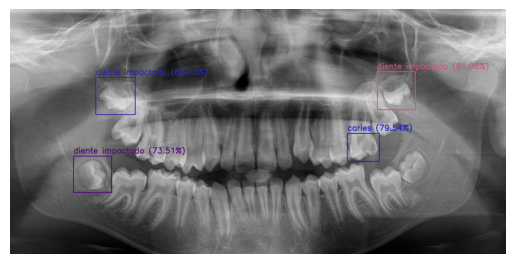

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_640/pred_train_335_png_jpg.rf.0962a84a6c7b5f3745e962a5165cb2c7.jpg

0: 352x640 2 cariess, 1 endodoncia, 52.4ms
Speed: 3.1ms preprocess, 52.4ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


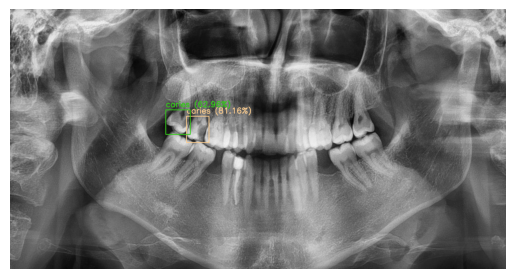

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_640/pred_train_426_png_jpg.rf.3114f603da98838285b868e67615be86.jpg

0: 320x640 (no detections), 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


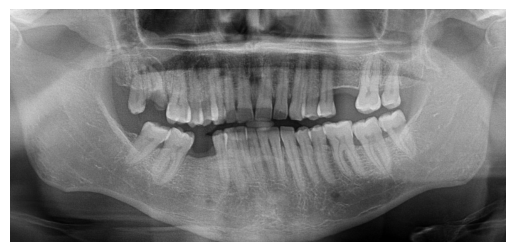

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_640/pred_train_692_png_jpg.rf.892dd275f0dd55bbf0124beca680d37d.jpg

0: 320x640 1 diente impactado, 9.9ms
Speed: 2.5ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


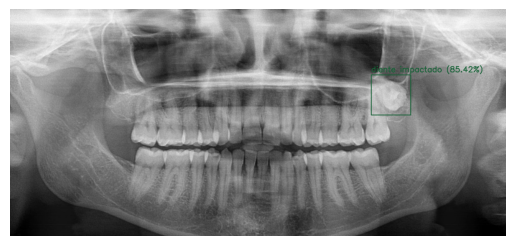

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_640/pred_train_204_png_jpg.rf.48c2aef29b60a3906e1878e37ad37690.jpg

0: 288x640 2 diente impactados, 1 endodoncia, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


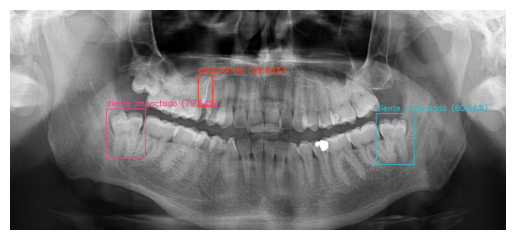

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_s_640/pred_train_415_png_jpg.rf.030222fc1f6e1672459b2fa240915cab.jpg


In [124]:
run_inference('/content/vpc/checkpoints/datasets_yolo_3/model_s/train/weights/best.pt', image_folder,random_images, results_dir_yolo_3_model_s_640, threshold=0.5)

## Inferencia sobre modelo NANO 640

In [114]:
# Definir la ruta donde se guardarán los resultados del modelo para el modelo datastes 3
results_dir_yolo_3_model_nano_640 = results_dir_parent+"datasets_yolo_3/model_nano_640"
results_dir_yolo_3_model_nano_640

'/content/vpc/results/datasets_yolo_3/model_nano_640'

In [115]:
# Crear la carpeta en caso de que no exista
os.makedirs(results_dir_yolo_3_model_s_640, exist_ok=True)


0: 320x640 2 cariess, 3 diente impactados, 1 endodoncia, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)


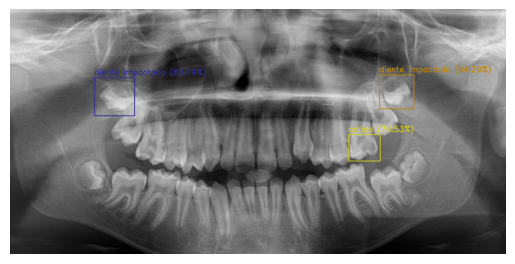

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_nano_640/pred_train_335_png_jpg.rf.0962a84a6c7b5f3745e962a5165cb2c7.jpg

0: 352x640 3 cariess, 1 endodoncia, 42.1ms
Speed: 3.0ms preprocess, 42.1ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


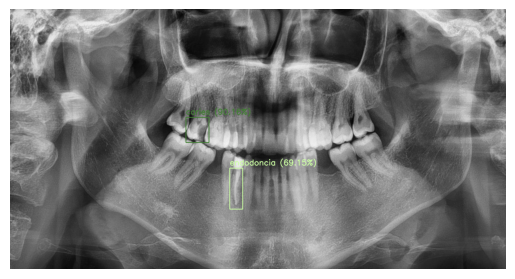

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_nano_640/pred_train_426_png_jpg.rf.3114f603da98838285b868e67615be86.jpg

0: 320x640 1 caries, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


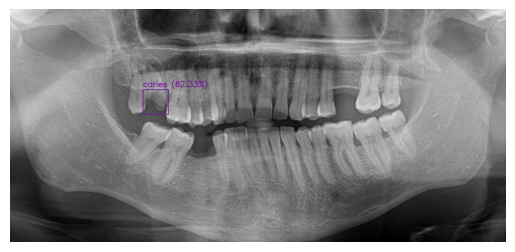

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_nano_640/pred_train_692_png_jpg.rf.892dd275f0dd55bbf0124beca680d37d.jpg

0: 320x640 1 diente impactado, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


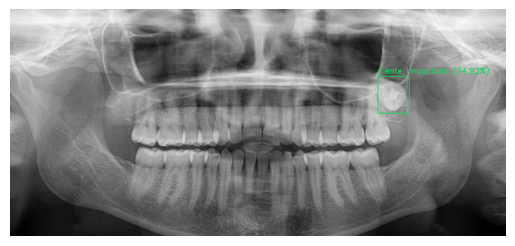

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_nano_640/pred_train_204_png_jpg.rf.48c2aef29b60a3906e1878e37ad37690.jpg

0: 288x640 2 diente impactados, 1 endodoncia, 43.2ms
Speed: 2.6ms preprocess, 43.2ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


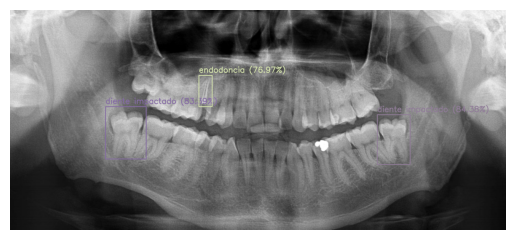

Imagen guardada en: /content/vpc/results/datasets_yolo_3/model_nano_640/pred_train_415_png_jpg.rf.030222fc1f6e1672459b2fa240915cab.jpg


In [125]:
run_inference('/content/vpc/checkpoints/datasets_yolo_3/train/weights/best.pt', image_folder,random_images, results_dir_yolo_3_model_nano_640, threshold=0.5)